## Additional import for adding package path for iCSF

In [1]:
import sys
sys.path.append("/mnt/iusers01/jf01/mbcx9cd4/.local/lib/python3.6/site-packages")
print('\n'.join(sys.path))
#add the right path to look for the packages (incl. lmfit)


/opt/gridware/el7/apps/binapps/anaconda3/4.2.0/lib/python35.zip
/opt/gridware/el7/apps/binapps/anaconda3/4.2.0/lib/python3.5
/opt/gridware/el7/apps/binapps/anaconda3/4.2.0/lib/python3.5/plat-linux
/opt/gridware/el7/apps/binapps/anaconda3/4.2.0/lib/python3.5/lib-dynload
/opt/gridware/el7/apps/binapps/anaconda3/4.2.0/lib/python3.5/site-packages
/opt/gridware/el7/apps/binapps/anaconda3/4.2.0/lib/python3.5/site-packages/Sphinx-1.4.6-py3.5.egg
/opt/gridware/el7/apps/binapps/anaconda3/4.2.0/lib/python3.5/site-packages/setuptools-27.2.0-py3.5.egg
/opt/gridware/el7/apps/binapps/anaconda3/4.2.0/lib/python3.5/site-packages/IPython/extensions
/mnt/iusers01/jf01/mbcx9cd4/.ipython
/mnt/iusers01/jf01/mbcx9cd4/.local/lib/python3.6/site-packages


## Import packages

In [2]:
#import the models and plotting tools

import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import PseudoVoigtModel
from lmfit import Model
from lmfit.parameter import Parameters
from ipywidgets import FloatProgress
from IPython.display import display

from scipy.signal import medfilt

import time
import os
import pickle

#import diamond_functions as dia
from diamond_functions import *

#for graphs inline with the text on mac and widows...
%matplotlib inline
#for interactive graphs inline with the text on mac and widows...
#%matplotlib interactive
#best for pop-out graphs on windows...
#%matplotlib tk
#best for pop-out graphs on mac...
# %matplotlib
#for pop-out graphs on mac and windows, but it's a bit dodgey...
#%matplotlib qt

## Adjusting plot parameters

In [312]:
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
plt.rc('legend',fontsize=20)
plt.rc('axes',linewidth=2)
plt.rc('xtick.major',width=2,size=10)
plt.rc('xtick.minor', width=2, size=5)
plt.rc('ytick.major',width=2,size=10)
plt.rc('ytick.minor',width=2,size=5)

May need to adjust the peak centres of these slightly before starting a run through all of the data

## File Prefix

Set filePrefix here, this is used throughout the script for the directory and file name

In [313]:
filePrefix = "adc_041_7Nb_NDload_700C_15mms"

## Create merged cake files for increasing intensity or greater no. of points

If you want to sum any cakes together to increase peak intensity use:

Note, bottom merges the bottom 3 slices, top is top 3 slices, vertical is top and bottom, horizontal is 3 slices from left and 3 slices from the right.

In [5]:
# merge_peak_intensity(filePrefix, 1, 5657, 'bottom')
# merge_peak_intensity(filePrefix, 1, 5657, 'top')
# merge_peak_intensity(filePrefix, 1, 5657, 'vertical')
# merge_peak_intensity(filePrefix, 1, 5657, 'horizontal')

# merge_peak_intensity(filePrefix, 1, 5657, 'horizontal')

If you want to merge any cakes to add a greater number of intensity points use:

In [6]:
# merge_peak_points(filePrefix, 1, 5657, 'bottom')
# merge_peak_points(filePrefix, 1, 5657, 'top')
# merge_peak_points(filePrefix, 1, 5657, 'vertical')
# merge_peak_points(filePrefix, 1, 5657, 'horizontal')

merge_peak_points(filePrefix, 1, 3418, 'vertical')

## Analyse single image file using the class object

Define directory and filename:

In [47]:
dirname='Data/'+filePrefix + '_ascii/'
fname=filePrefix + '_03418.dat'

Define different directory and filename if analysing merged data (as created above):

In [7]:
dirname='Data/'+filePrefix + '_ascii/Merge/'
# fname=filePrefix + '_MergeCakePoints1+2+3_02000.dat'
# fname=filePrefix + '_MergeCakePoints_bottom_00001.dat'
# fname=filePrefix + '_MergeCakePoints_top_00001.dat'
# fname=filePrefix + '_MergeCakePoints_vertical_00001.dat'
# fname=filePrefix + '_MergeCakePoints_horizontal_00001.dat'

fname=filePrefix + '_MergeCakePoints_vertical_00001.dat'

Create a FitCake (class) instance:

In [8]:
#note, in Dawn 0 deg is defined as right hand side of diffraction image and increases clockwise.
#therefore, column 1 is right hand cake at -5 to 5 deg if using 10 deg slices i.e. in Dawn (-5,355).
#column 0 is the two-theta data in the file.

# image_1=FitCake(dirname,fname,cake=28)
image_1=FitCake(dirname,fname,cake=1)

Use the spectrum in the object and the plot_spectrum function to plot the entire spectrum:

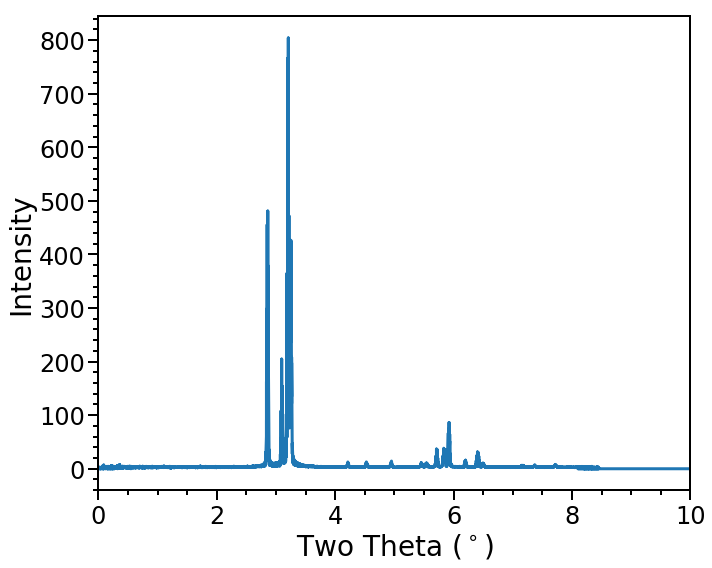

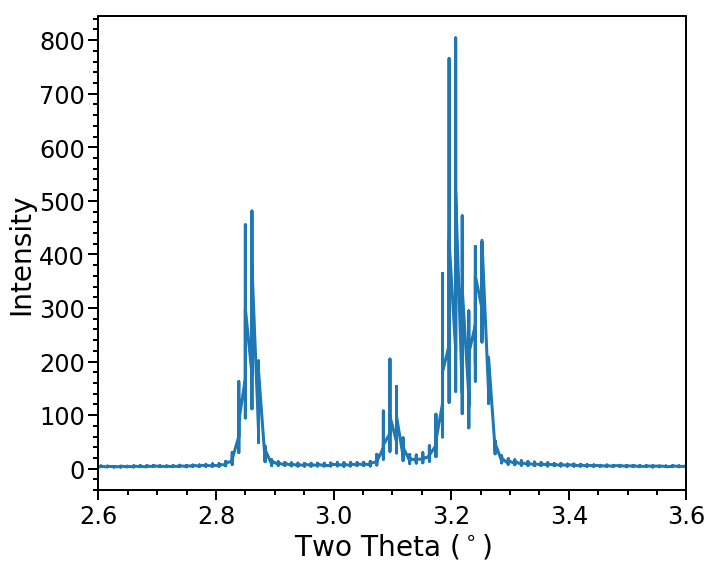

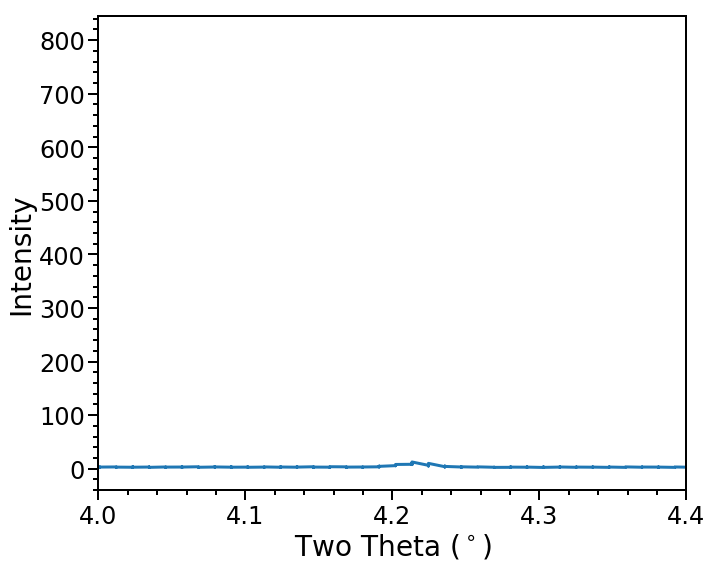

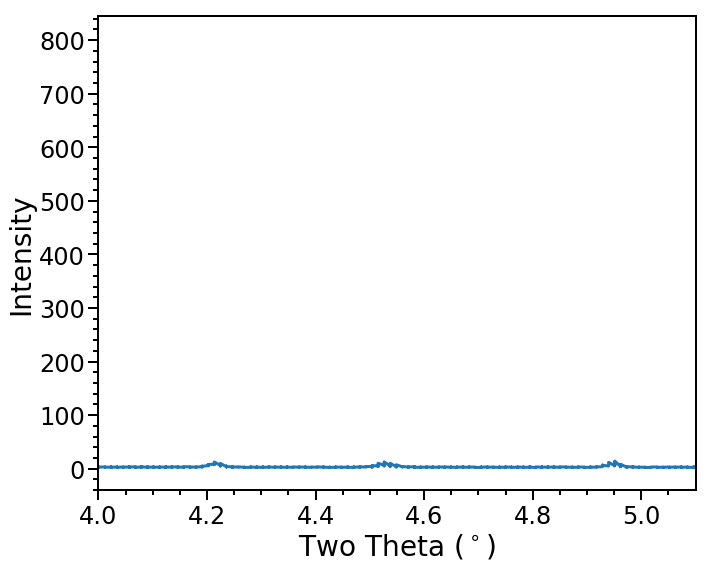

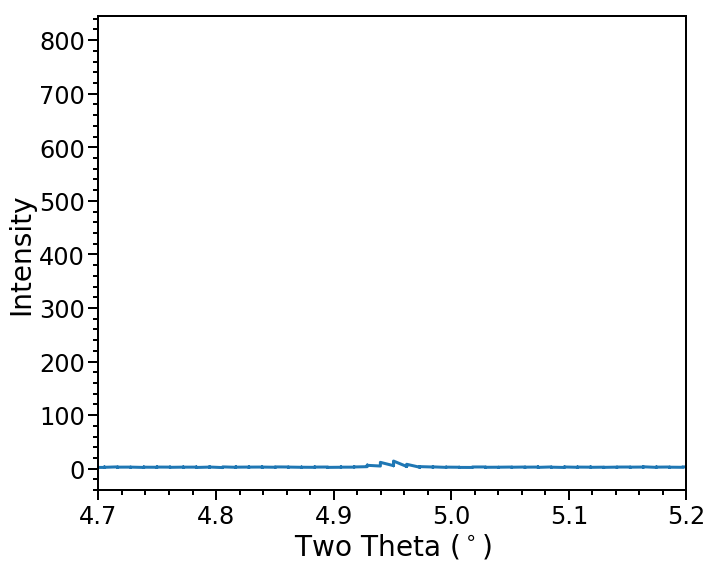

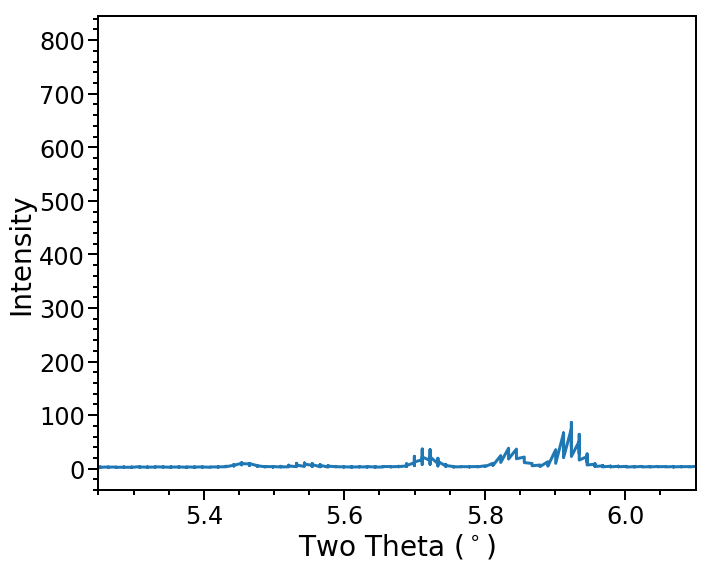

In [9]:
image_1.plot_spectrum()
image_1.plot_spectrum(2.6,3.6) #10-10, 0002, 110, 10-11 (fit 0002 and 10-11 as double peaks)
image_1.plot_spectrum(4.0,4.4) #10-12
image_1.plot_spectrum(4.0,5.1) #200
image_1.plot_spectrum(4.7,5.2) #11-20
image_1.plot_spectrum(5.25,6.1) #10-13, 211, 20-20, 11-22, 20-21 (fit 11-22 and 20-21 as double peaks)
# and also fit 10-13 and 211 as double peaks.

Define peak bounds and labels by checking the peaks (note, these will be adjusted during the run, but the width will be kept constant):

In [18]:
peak_bounds_initial = [(2.7, 3.0), (4.05, 4.35), (4.40, 4.70), (4.85, 5.07)]
peak_labels_initial = ['(10-10)', '(10-12)', '(200)', '(11-20)']

# peak_bounds_initial = [(2.7, 3.0), (4.05, 4.35), (4.40, 4.70), (4.85, 5.07), (5.35, 5.57)]
# peak_labels_initial = ['(10-10)', '(10-12)', '(200)', '(11-20)', '(10-13)']

In [17]:
peak_bounds_initial = [(5.35, 5.60)]
peak_labels_initial = ['(211)']

The method `fit_peaks` fits the peaks defined:

In [19]:
image_1.fit_peaks(peak_labels_initial, peak_bounds_initial)

Results for each peak can be just looked up:

In [20]:
image_1.fits_dict['(10-10)'].values

{'amplitude': 8.139391421959475,
 'center': 2.85672425356153,
 'constBG': 5.459194854405636,
 'fraction': 0.20017656240276605,
 'fwhm': 0.026156342233136964,
 'height': 273.47334879810643,
 'sigma': 0.013078171116568482}

Peak centre:

In [21]:
image_1.fits_dict['(10-10)'].values['center']

2.85672425356153

There is also a method for plotting the fit:

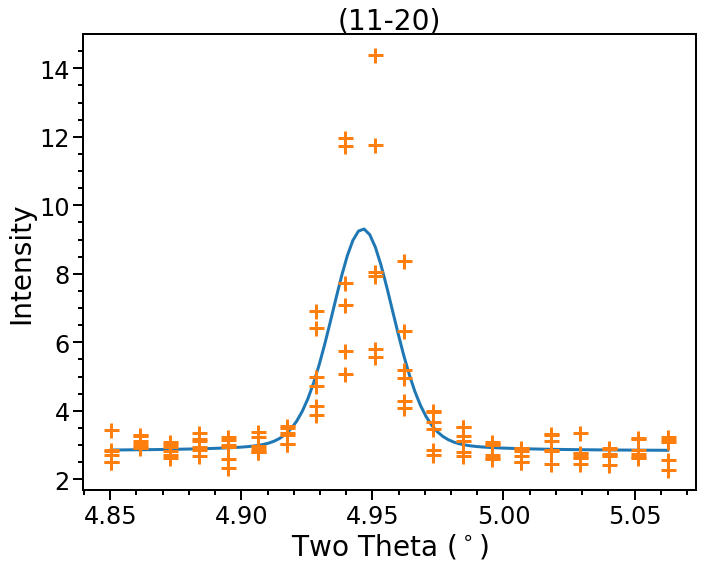

In [25]:
image_1.plot_fit('(11-20)')

## Run through all 'images'

Fit the peaks without passing initial parameters.

Note, options are 'normal' or 'bottom', 'top', 'vertical', 'horizontal' for merged cake points (merged intensity points not currently included).

In [ ]:
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'normal', step=1, cake=1)
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'bottom', step=1, cake=1)
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'top', step=1, cake=1)
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'vertical', step=1, cake=1)
# fits=run_thru_images(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'horizontal', step=1, cake=1)

fits=run_thru_images(filePrefix, 1, 3418, peak_bounds_initial, peak_labels_initial, 'vertical', step=1, cake=1)

We could also pass on the initial parameters in the fittings, but this can lead to errors during the run:

In [90]:
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'normal', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'bottom', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'top', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'vertical', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial,'one', 'horizontal', step=1, cake=1)

fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'vertical','one', step=1, cake=1)

--- 1193.8390891551971 seconds ---


This creates a dictionary with all the class objects contaiing the fits:

In [16]:
print(fits)

{'adc_065_TI64_NDload_900C_15mms_00001': <diamond_functions.FitCake object at 0x1c218737b8>, 'adc_065_TI64_NDload_900C_15mms_00002': <diamond_functions.FitCake object at 0x1c218735c0>, 'adc_065_TI64_NDload_900C_15mms_00003': <diamond_functions.FitCake object at 0x111ca3d68>, 'adc_065_TI64_NDload_900C_15mms_00004': <diamond_functions.FitCake object at 0x1c21a8bf60>, 'adc_065_TI64_NDload_900C_15mms_00005': <diamond_functions.FitCake object at 0x111c97438>, 'adc_065_TI64_NDload_900C_15mms_00006': <diamond_functions.FitCake object at 0x1c21af6828>, 'adc_065_TI64_NDload_900C_15mms_00007': <diamond_functions.FitCake object at 0x1c21af6630>, 'adc_065_TI64_NDload_900C_15mms_00008': <diamond_functions.FitCake object at 0x1c21af3d30>, 'adc_065_TI64_NDload_900C_15mms_00009': <diamond_functions.FitCake object at 0x114e2be48>, 'adc_065_TI64_NDload_900C_15mms_00010': <diamond_functions.FitCake object at 0x1c21af3fd0>}


In [18]:
fits.keys()

dict_keys(['adc_065_TI64_NDload_900C_15mms_00001', 'adc_065_TI64_NDload_900C_15mms_00002', 'adc_065_TI64_NDload_900C_15mms_00003', 'adc_065_TI64_NDload_900C_15mms_00004', 'adc_065_TI64_NDload_900C_15mms_00005', 'adc_065_TI64_NDload_900C_15mms_00006', 'adc_065_TI64_NDload_900C_15mms_00007', 'adc_065_TI64_NDload_900C_15mms_00008', 'adc_065_TI64_NDload_900C_15mms_00009', 'adc_065_TI64_NDload_900C_15mms_00010'])

### Still confused about where our fitted data is???

Dictionary called fits contains keys (with the image name/number) and a FitCake class object for each key. 
The FitCake class object then contains;

- a list of the reflections (reflection_list)
- a dictionary containing the data (2-theta and intensity) for each of the reflections (data_dict)
- a dictionary containing the fitted line to the data, 100x 2-theta and intensity points, for each of the relections (lines_dict)
- a dictionary containing the class object from the lmfit model for each of the reflections (fits_dict)

In [16]:
fit_number='_00001'
fit_string=filePrefix+fit_number

# print(fits)
# print(fits[fit_string])
# print(fits[fit_string].reflection_list)
# print(fits[fit_string].data_dict)
# print(fits[fit_string].lines_dict)
print(fits[fit_string].fits_dict)

{'(10-13)': <lmfit.model.ModelResult object at 0x7f3011b1e198>, '(200)': <lmfit.model.ModelResult object at 0x7f3011b2b828>, '(10-12)': <lmfit.model.ModelResult object at 0x7f300c1d4f60>, '(11-20)': <lmfit.model.ModelResult object at 0x7f300c4080f0>, '(10-10)': <lmfit.model.ModelResult object at 0x7f300c423320>}


The lmfit model class object contains a dictionary of parameters, such as peak center, fwhm, etc.

In [17]:
# print(fits[fit_string].fits_dict['(10-10)'].params)
# print(fits[fit_string].fits_dict['(10-10)'].params['sigma'])
print(fits[fit_string].fits_dict['(10-10)'].values)

{'amplitude': 2.507420604186965, 'fraction': 0.08733253120591417, 'height': 73.944397358214843, 'fwhm': 0.030959121697910798, 'sigma': 0.015479560848955399, 'center': 3.154472914712148, 'constBG': 5.211620705754993}


## Fit overlapping peaks

Define directory and filename:

In [8]:
dirname='Data/'+filePrefix + '_ascii/'
fname=filePrefix + '_00001.dat'

Define different directory and filename if analysing merged data:

In [5]:
dirname='Data/'+filePrefix + '_ascii/Merge/'
#fname=filePrefix + '_MergeCakePoints1+2+3_00001.dat'
# fname=filePrefix + '_MergeCakePoints_bottom_00001.dat'
# fname=filePrefix + '_MergeCakePoints_top_00001.dat'
# fname=filePrefix + '_MergeCakePoints_vertical_00001.dat'
# fname=filePrefix + '_MergeCakePoints_horizontal_00001.dat'
fname=filePrefix + '_MergeCakePoints_vertical_00001.dat'

Create a Fit2Peak or Fit3Peak instance (different class for fitting overlapping peaks):

In [6]:
image_1=Fit2Peak(dirname,fname,cake=1)

In [44]:
image_1=Fit3Peak(dirname,fname,cake=1)

Use the spectrum in the object and the plot_spectrum function to plot the entire spectrum:

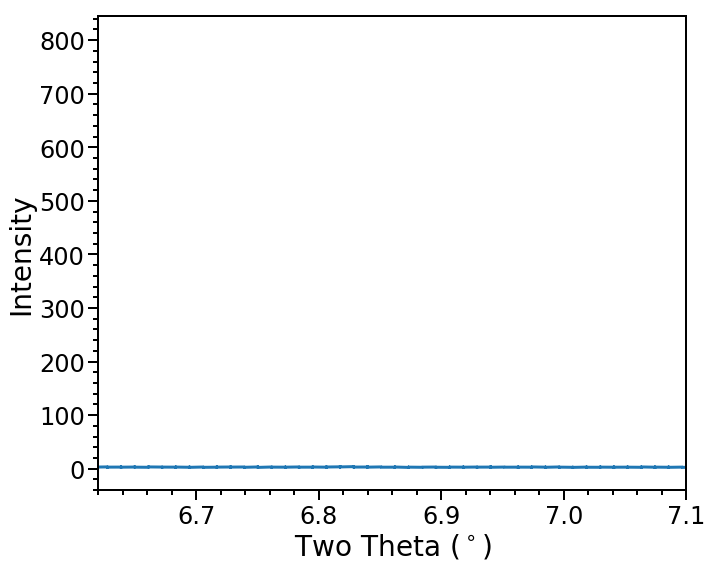

In [7]:
image_1.plot_spectrum(6.62,7.1)

# image_1.plot_spectrum(2.6,3.6) #10-10, 0002, 110, 10-11 (fit 0002 and 10-11 as double peaks)
# image_1.plot_spectrum(4.0,4.4) #10-12
# image_1.plot_spectrum(4.0,5.1) #200
# image_1.plot_spectrum(4.7,5.2) #11-20
# image_1.plot_spectrum(5.25,6.1) #10-13, 211, 20-20, 11-22, 20-21 (fit 11-22 and 20-21 as double peaks)
# # and also fit 10-13 and 211 as double peaks.

Define peak bounds (in this case covering the 3 overlapping peaks for the entire thermo-mechanical cycle) and labels of the overlapping peaks as a single string:

In [47]:
peak_bounds_initial = [(3.0, 3.5)]
peak_labels_initial = ['(0002),(110),(10-11)']
#starting centres for the function fit_two_peaks are 3.42, 3.54, 3.59

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
pv_1_cent=3.09
pv_1_min=3.05
pv_1_max=3.11

pv_2_cent=3.205
pv_2_min=3.13
pv_2_max=3.21

pv_3_cent=3.25
pv_3_min=3.222
pv_3_max=3.28

In [44]:
peak_bounds_initial = [(3.0, 3.5)]
peak_labels_initial = ['(110),(10-11)']
#starting centres for the function fit_two_peaks are 3.42, 3.54, 3.59

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
# pv_1_cent=3.205
# pv_1_min=3.15
# pv_1_max=3.205

# pv_2_cent=3.25
# pv_2_min=3.222
# pv_2_max=3.28

pv_1_cent=3.205
pv_1_min=3.13
pv_1_max=3.21

pv_2_cent=3.25
pv_2_min=3.222
pv_2_max=3.28

In [71]:
peak_bounds_initial = [(6.15, 6.71)]
peak_labels_initial = ['(11-22),(20-21)']
#starting centres for the function fit_two_peaks are 6.45, 6.54

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
# pv_1_cent=6.32
# pv_1_min=6.30
# pv_1_max=6.47

# pv_2_cent=6.47
# pv_2_min=6.46
# pv_2_max=6.56

pv_1_cent=6.41
pv_1_min=6.28
pv_1_max=6.47

pv_2_cent=6.50
pv_2_min=6.43
pv_2_max=6.56

In [129]:
peak_bounds_initial = [(6.62, 7.10)]
peak_labels_initial = ['(0004),(220)']
#starting image is around 1700 
#starting centres for the function fit_two_peaks are 6.78, 6.94

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
pv_1_cent=6.75
pv_1_min=6.37
pv_1_max=6.85

pv_2_cent=6.92
pv_2_min=6.86
pv_2_max=7.02

In [8]:
peak_bounds_initial = [(5.2, 5.63)]
peak_labels_initial = ['(10-13),(211)']
#starting image is around 1700 
#starting centres for the function fit_two_peaks are 6.78, 6.94

#note, min and max values are not the same as bounds around the peak, but values that they can go up to!
pv_1_cent=5.45
pv_1_min=5.35
pv_1_max=5.47

pv_2_cent=5.55
pv_2_min=5.46
pv_2_max=5.56

The method `fit_2_peaks` or `fit_3_peaks` now fits three overlapping peaks:

In [9]:
image_1.fit_2_peaks(peak_labels_initial, peak_bounds_initial, 
                    pv_1_cent, pv_1_min, pv_1_max,
                    pv_2_cent, pv_2_min, pv_2_max)

In [48]:
image_1.fit_3_peaks(peak_labels_initial, peak_bounds_initial, 
                    pv_1_cent, pv_1_min, pv_1_max,
                    pv_2_cent, pv_2_min, pv_2_max,
                    pv_3_cent, pv_3_min, pv_3_max)

Results for the fit to all three peaks can be looked up:

In [91]:
# image_1.fits_dict['(11-22),(20-21)'].values
image_1.fits_dict['(10-13),(211)'].values
# image_1.fits_dict['(0002),(110),(10-11)'].values

{'constBG': 3.54607456795462,
 'pv_1amplitude': 0.10416362870942719,
 'pv_1center': 5.453652049969463,
 'pv_1fraction': 0.06738864649918758,
 'pv_1fwhm': 0.031039217795778493,
 'pv_1height': 3.0841493946381782,
 'pv_1sigma': 0.015519608897889246,
 'pv_2amplitude': 0.1289400158043732,
 'pv_2center': 5.55641586685224,
 'pv_2fraction': 0.9977949010233036,
 'pv_2fwhm': 0.039915998877261494,
 'pv_2height': 2.0586197153949186,
 'pv_2sigma': 0.019957999438630747}

Now, the peak centre of each peak is additionally labelled pv_1, pv_2 and pv_3:

In [40]:
print('peak centres...')
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_1center'])
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_2center'])
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_3center'])

print('peak sigmas...')
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_1sigma'])
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_2sigma'])
print(image_1.fits_dict['(0002),(110),(10-11)'].values['pv_3sigma'])

peak centres...


KeyError: '(0002),(110),(10-11)'

The three peak fit can also be plotted:

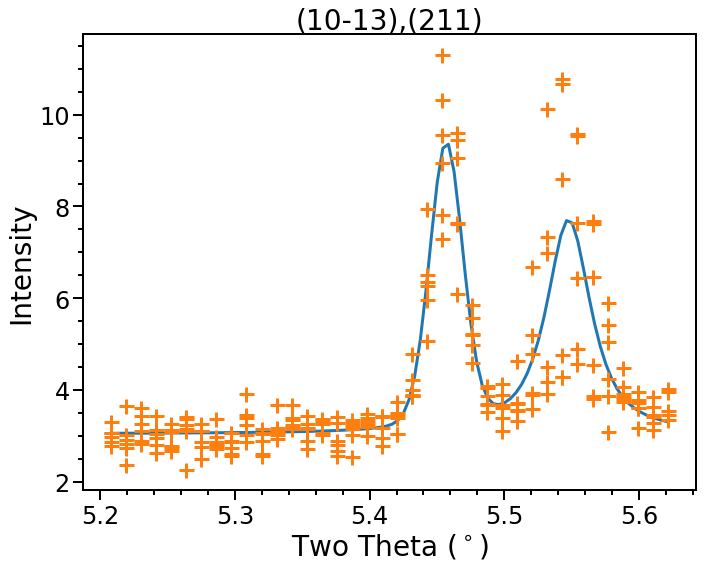

In [10]:
# image_1.plot_fit('(0002),(110),(10-11)')
# image_1.plot_fit('(110),(10-11)')
# image_1.plot_fit('(11-22),(20-21)')
image_1.plot_fit('(10-13),(211)')
# image_1.plot_fit('(0004),(220)')

### Run through all images with overlapping peaks

With fitting 2 or 3 overlapping peaks, choose a two-theta range which covers the peaks over the entire thermomechanical cycle. Currrently, peak bounds aren't adjusted within the loop in this case.

The initial parameters need to be passed in this case, so that the pseudo-voigt fit correctly identifies the three peaks each time.

Fitting 2 peaks:

In [11]:
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'normal','two', step=1, cake=1,)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'bottom','two', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'top','two', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'vertical','two', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'horizontal','two', step=1, cake=1)

fits=run_thru_images_initParams(filePrefix, 1, 3418, peak_bounds_initial, peak_labels_initial, 'vertical','two', 
                                pv_1_cent, pv_1_min, pv_1_max,
                                pv_2_cent, pv_2_min, pv_2_max,
                                step=1, cake=1)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


Fitting 3 peaks:

In [50]:
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'normal','three', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'bottom','three', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'top','three', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'vertical','three', step=1, cake=1)
# fits=run_thru_images_initParams(filePrefix, 1, 5657, peak_bounds_initial, peak_labels_initial, 'horizontal','three', step=1, cake=1)

fits=run_thru_images_initParams(filePrefix, 1, 3418, peak_bounds_initial, peak_labels_initial, 'vertical','three', 
                                pv_1_cent, pv_1_min, pv_1_max,
                                pv_2_cent, pv_2_min, pv_2_max,
                                pv_3_cent, pv_3_min, pv_3_max,
                                step=1, cake=1)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


## Check the fitting data

We can then easily plot the fits for each reflection:

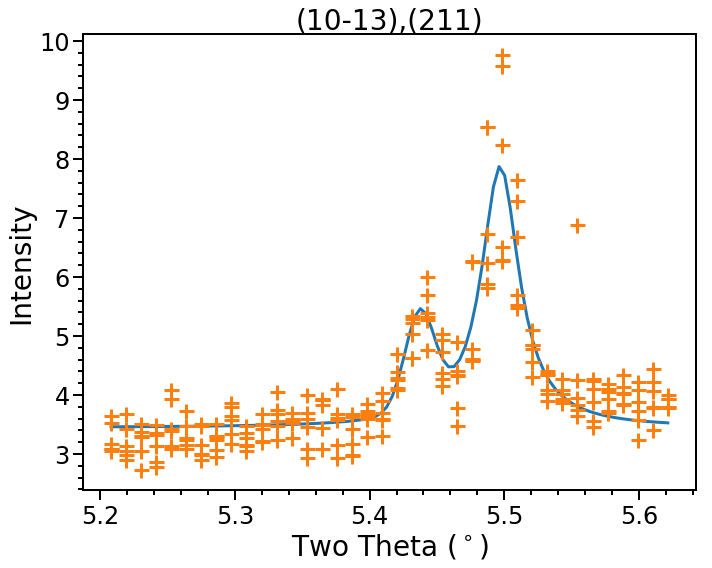

In [12]:
fit_number='_03000'
fit_string=filePrefix+fit_number

fit=fits[fit_string]
# '(10-10)', '(10-12)', '(200)', '(11-20)', '(10-13)'
# fit.plot_fit('(200)')
# fit.plot_fit('(10-12)')

# fit.plot_fit('(0002),(110),(10-11)')
# fit.plot_fit('(110),(10-11)')
# fit.plot_fit('(11-22),(20-21)')
fit.plot_fit('(10-13),(211)')
# fit.plot_fit('(211)')
# fit.plot_fit('(0004),(220)')


# fit.fits_dict['(11-22),(20-21)'].values
# fit.fits_dict['(10-13),(211)'].values

Note, if you weren't able to fit the peaks at the start and you skipped some images, then the graph will not show the correct image number (i.e. image number + skipped files).

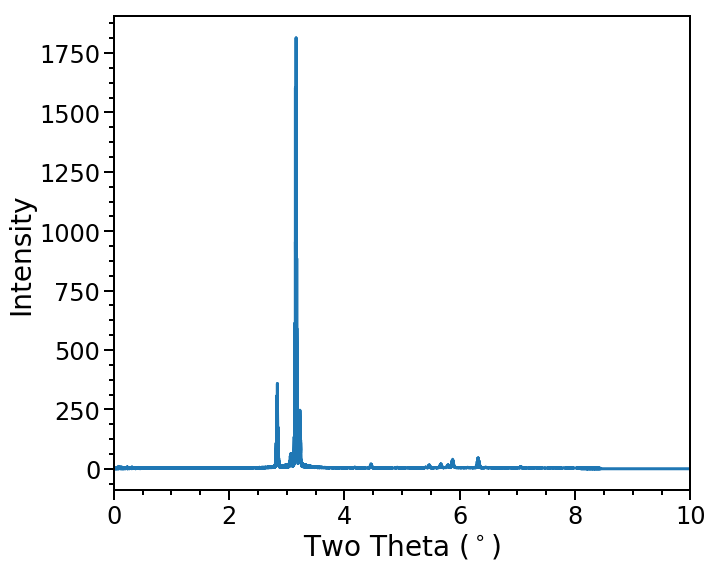

In [17]:
fit=fits[fit_string]
fit.plot_spectrum()
# fit=fits['adc_065_TI64_NDload_900C_15mms_03297']
# fit.plot_spectrum()

### Extracting peak centres

Dictionaries are saved in a time order on mac or windows, which makes iterating through them easier with "for cake, fit in fits.items():". However, on iCSF/linux they are scrambled and can only be accessed by the key. So, we now iterate through the files using...

In [13]:
firstFile = 1
lastFile = 3418
step = 1

for image_number in range(firstFile,lastFile+1,step):
    
    fnumber='_{:05d}'.format(image_number)
    fname=filePrefix + fnumber

In [17]:
peak_centres=dict()

for reflection in fit.reflection_list:
    peak_centres[reflection]=[]

for image_number in range(firstFile,lastFile+1,step):
    
    fnumber='_{:05d}'.format(image_number)
    fname=filePrefix + fnumber
    fit=fits[fname]
    
    for reflection in fit.reflection_list:
        # for single peak fit
#         ttheta=fit.fits_dict[reflection].values['center']

        # for double and triple peak fit
        ttheta=fit.fits_dict[reflection].values['pv_1center']
#         ttheta=fit.fits_dict[reflection].values['pv_2center']
#         ttheta=fit.fits_dict[reflection].values['pv_3center']

        peak_centres[reflection].append(ttheta)

In [18]:
# peak_centres=dict()

# for reflection in fit.reflection_list:
#       peak_centres[reflection]=[]

# for cake, fit in fits.items():
#     for reflection in fit.reflection_list:
#         for single peak fit
#         ttheta=fit.fits_dict[reflection].values['center']

#         peak_centres[reflection].append(ttheta)

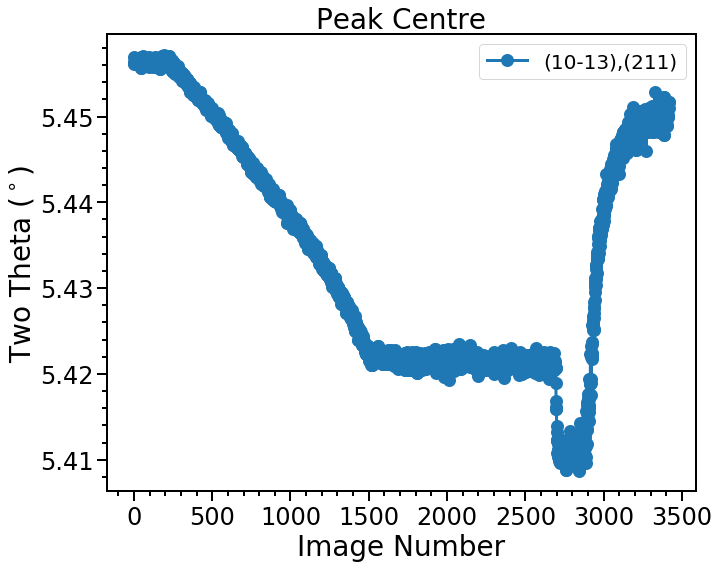

In [19]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in fit.reflection_list:
    plt.plot(peak_centres[reflection],'-o', linewidth=3, markersize=10, mew=3)
    plt.legend(fit.reflection_list)
    plt.xlabel('Image Number', fontsize=28)
    plt.ylabel(r'Two Theta ($^\circ$)',fontsize=28)
    plt.title('Peak Centre', fontsize =28)
    plt.tight_layout()

### Plotting d-spacing

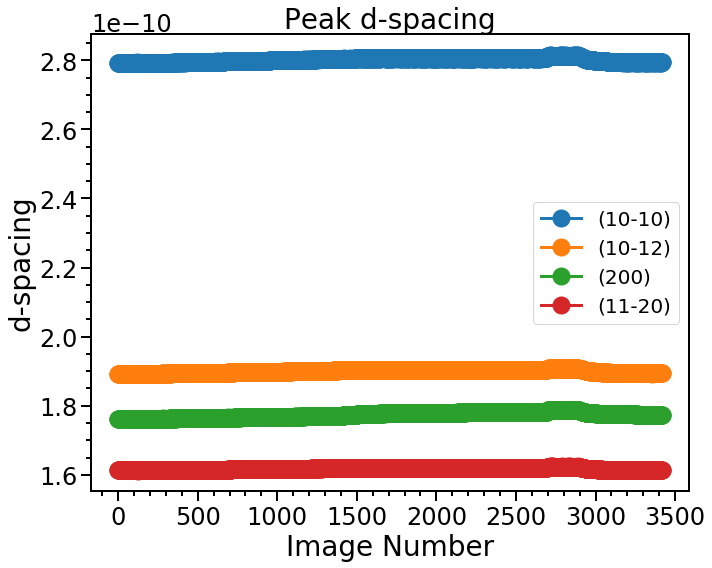

In [34]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in fit.reflection_list:
    d_spacing=calc_dspacing(peak_centres[reflection])
    plt.plot(d_spacing,'-o', linewidth=3, markersize=15, mew=3)
    plt.legend(fit.reflection_list)
    plt.title('Peak d-spacing', fontsize = 28)
    plt.ylabel('d-spacing', fontsize=28)
    plt.xlabel('Image Number', fontsize=28)
    plt.tight_layout()

### Calculating and plotting strain

In [35]:
for reflection in fit.reflection_list:
    print(reflection)
    print(np.std(peak_centres[reflection][0:200]))

(10-10)
0.000257453899374
(10-12)
0.000296164720697
(200)
0.000409365404337
(11-20)
0.000264517788152


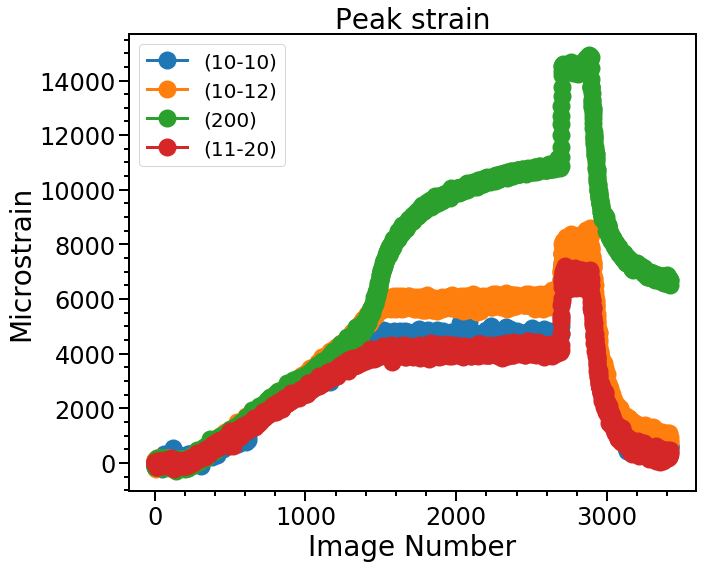

In [36]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in fit.reflection_list:
    if reflection !='(20-20)':
        if reflection !='(20-21)':
            strain=calc_strain(peak_centres[reflection])*1e6
            plt.plot(strain,'-o', linewidth=3, markersize=15, mew=3)
            plt.legend(fit.reflection_list)
            plt.title('Peak strain', fontsize = 28)
            plt.ylabel('Microstrain', fontsize = 28)
            plt.xlabel('Image Number', fontsize = 28)
            plt.tight_layout()

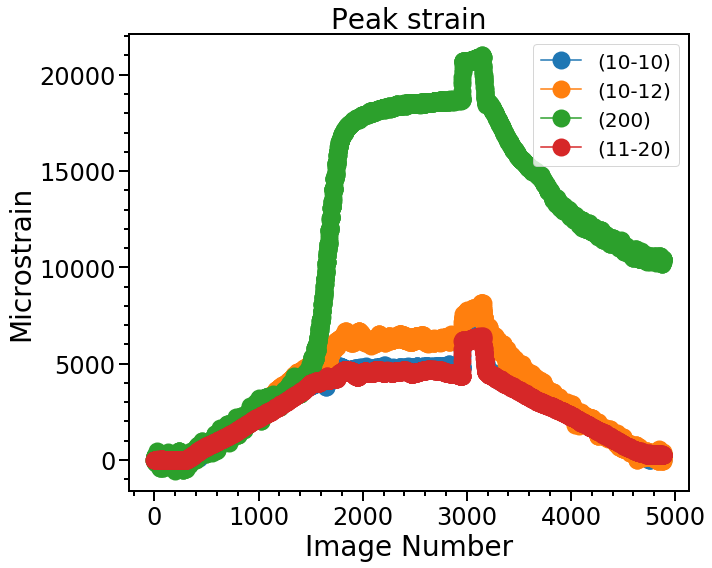

In [30]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in fit.reflection_list:
    if reflection !='(20-20)':
        if reflection !='(20-21)':
            strain=calc_strain(peak_centres[reflection])*1e6
            strain = medfilt(strain,5)
            plt.plot(strain,'-o', markersize=15, mew=3)
            plt.legend(fit.reflection_list)
            plt.title('Peak strain', fontsize=28)
            plt.ylabel('Microstrain', fontsize =28)
            plt.xlabel('Image Number', fontsize=28)
            plt.tight_layout()

### FWHM

In [35]:
peak_fwhm=dict()

for reflection in fit.reflection_list:
    peak_fwhm[reflection]=[]

for image_number in range(firstFile,lastFile+1,step):
    
    fnumber='_{:05d}'.format(image_number)
    fname=filePrefix + fnumber
    fit=fits[fname]
    
    for reflection in fit.reflection_list:
        ttheta=fit.fits_dict[reflection].values['fwhm']
        peak_fwhm[reflection].append(ttheta)

In [36]:
# peak_fwhm=dict()

# for reflection in fit.reflection_list:
#       peak_fwhm[reflection]=[]

# for cake, fit in fits.items():
#     for reflection in fit.reflection_list:
#         ttheta=fit.fits_dict[reflection].values['fwhm']
#         peak_fwhm[reflection].append(ttheta)

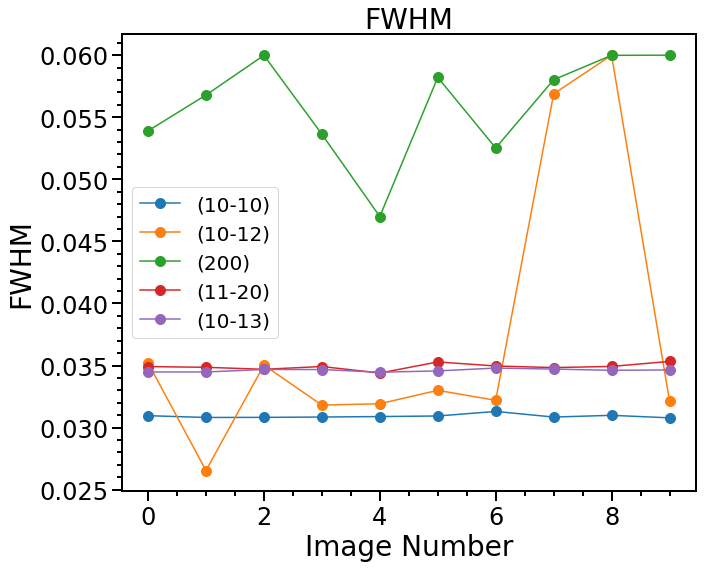

In [37]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in fit.reflection_list:
    plt.plot(peak_fwhm[reflection],'-o', markersize=10)
    plt.legend(fit.reflection_list)
    plt.ylabel('FWHM', fontsize =28)
    plt.xlabel('Image Number', fontsize=28)
    plt.title('FWHM',fontsize=28)
    plt.tight_layout()

Apply some smoothing to the data

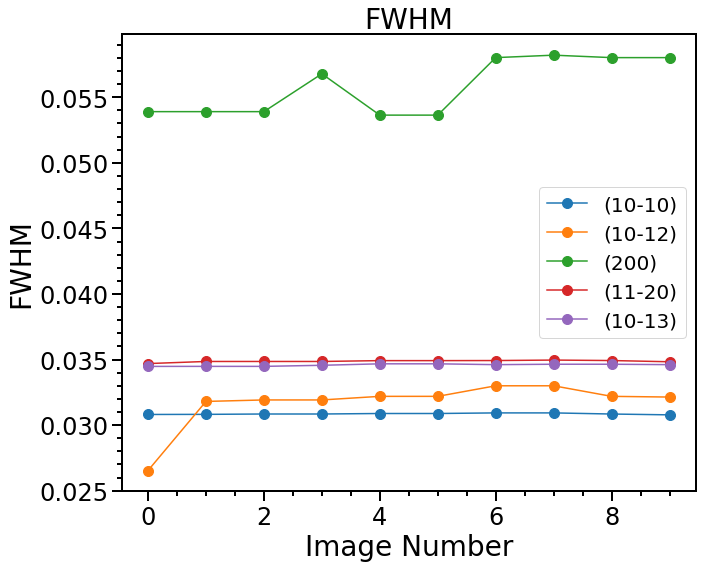

In [38]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in fit.reflection_list:
    plt.plot(medfilt(peak_fwhm[reflection],5),'-o', markersize=10)
    plt.legend(fit.reflection_list)
    plt.ylabel('FWHM', fontsize =28)
    plt.xlabel('Image Number', fontsize=28)
    plt.title('FWHM',fontsize=28)
    plt.tight_layout()

## Amplitude

In [39]:
peak_amplitude=dict()

for reflection in fit.reflection_list:
        peak_amplitude[reflection]=[]

for image_number in range(firstFile,lastFile+1,step):
    
    fnumber='_{:05d}'.format(image_number)
    fname=filePrefix + fnumber
    fit=fits[fname]
    
    for reflection in fit.reflection_list:
        ttheta=fit.fits_dict[reflection].values['amplitude']
        peak_amplitude[reflection].append(ttheta)

In [40]:
# peak_amplitude=dict()

# for reflection in fit.reflection_list:
#         peak_amplitude[reflection]=[]

# for cake, fit in fits.items():
#     for reflection in fit.reflection_list:
#         ttheta=fit.fits_dict[reflection].values['amplitude']
#         peak_amplitude[reflection].append(ttheta)

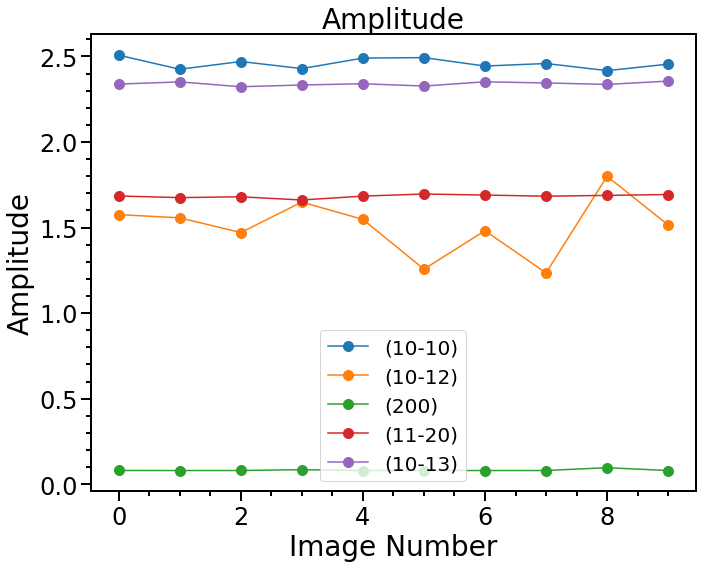

In [41]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in fit.reflection_list:
    plt.plot(peak_amplitude[reflection],'-o', markersize=10)
    plt.legend(fit.reflection_list)
    plt.ylabel('Amplitude', fontsize =28)
    plt.xlabel('Image Number', fontsize=28)
    plt.title('Amplitude', fontsize=28)
    plt.tight_layout()

## Save the Data

We can use 'pickle' to save our data. However, we can't pickle complex objects containing classes. So, let's rearrange our data into an easier to understand list of nested dictionaries:

In [37]:
firstFile = 1
lastFile = 3418
step = 1

In [38]:
sorted_list=[]

for image_number in range(firstFile,lastFile+1,step):
    
    fnumber='_{:05d}'.format(image_number)
    fname=filePrefix + fnumber
    
    peak_dict={}
    
    for reflection in fit.reflection_list:
        
        peak_dict[reflection]={}
        peak_dict[reflection]['data_dict']=fits[fname].data_dict[reflection]
        peak_dict[reflection]['lines_dict']=fits[fname].lines_dict[reflection]
        peak_dict[reflection]['params_values']=fits[fname].fits_dict[reflection].values
        
    sorted_list.append(peak_dict)

If we need to insert some more data into our dictionary, beacuse an error made the run crash half way through so we had to restart from the position it crashed. 

Then we need to re-access the dictionary in the list, instead of creating an empty dictionary at the start.

In [54]:
firstFile = 1
lastFile = 3418
step = 1

for image_number in range(firstFile,lastFile+1,step):

    fnumber='_{:05d}'.format(image_number)
    fname=filePrefix + fnumber
    
    peak_dict = sorted_list[image_number - 1]
    
    for reflection in fit.reflection_list:
        
        peak_dict[reflection]={}
        peak_dict[reflection]['data_dict']=fits[fname].data_dict[reflection]
        peak_dict[reflection]['lines_dict']=fits[fname].lines_dict[reflection]
        peak_dict[reflection]['params_values']=fits[fname].fits_dict[reflection].values
        
    sorted_list[image_number-1] = peak_dict

IndexError: list index out of range

Then we pickle our nested dictionaries to save them:

In [39]:
# cake_name='_cake_01_of_36'
# cake_name='_cake_mergetopandbottom'
# cake_name='_MergeCakePoints_bottom'
# cake_name='_MergeCakePoints_top'
cake_name='_MergeCakePoints_vertical1'
# cake_name='_MergeCakePoints_horizontal'

file='Data/FitResults/'
filename=file+filePrefix+cake_name+'.pickle'

os.makedirs(os.path.dirname(filename), exist_ok=True)

with open(filename, 'wb') as handle:
    pickle.dump(sorted_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

Data is saved as a list of dictionaries...

 - the list order is the file number -1
 
    - first key is the reflection lattice plane, such as (10-10), (11-20), etc.
        - second key is the data type, data_dict, lines_dict, params_values
 
            - data_dict contains an array of the 2-theta and intensity values within the peak bounds
            - lines_dict contains an array of the 100x points of the fit line within the peak bounds
            - params_values contains a dictionary for the psuedo voigt fitting parameters
            - params_values contains fraction,sigma,center,amplitude,fwhm,height,constBG


In [29]:
fit_number=0

# print(sorted_list)
# print(sorted_list[fit_number])
print(sorted_list[fit_number]['(10-10)'])
# print(sorted_list[fit_number]['(11-20)']['params_values'])
# print(sorted_list[fit_number]['(10-10)']['params_values']['fwhm'])

{'data_dict': array([[  3.0272503,   5.0882353],
       [  3.0272503,   5.2      ],
       [  3.0272503,   4.3870968],
       [  3.0272503,   4.4666667],
       [  3.0272503,   4.3333333],
       [  3.0272503,   3.4347826],
       [  3.0411358,   5.0857143],
       [  3.0411358,   4.90625  ],
       [  3.0411358,   4.8461538],
       [  3.0411358,   4.5333333],
       [  3.0411358,   4.483871 ],
       [  3.0411358,   3.8064516],
       [  3.0550213,   4.9666667],
       [  3.0550213,   4.5454545],
       [  3.0550213,   4.4482759],
       [  3.0550213,   4.40625  ],
       [  3.0550213,   5.1666667],
       [  3.0550213,   4.4482759],
       [  3.0689067,   4.8529412],
       [  3.0689067,   5.1428571],
       [  3.0689067,   4.53125  ],
       [  3.0689067,   4.4857143],
       [  3.0689067,   4.9142857],
       [  3.0689067,   4.6176471],
       [  3.0827922,   5.1470588],
       [  3.0827922,   5.4857143],
       [  3.0827922,   5.4242424],
       [  3.0827922,   4.9393939],
      

## Load a data file

In [314]:
# cake_name='_cake_01_of_36'
# cake_name='_cake_mergetopandbottom4'
# cake_name='_MergeCakePoints_bottom'
# cake_name='_MergeCakePoints_top'
cake_name='_MergeCakePoints_vertical4'
# cake_name='_MergeCakePoints_horizontal'


file='Data/FitResults/'
filename=file+filePrefix+cake_name+'.pickle'

with open(filename, 'rb') as handle:
    saved_list = pickle.load(handle)

Forgotten the reflections we analysed, let's check:

Note, remember that some reflections might not have started at the first image

In [315]:
#note, the fit_number is -1 compared to the image_number, since lists start at [0]
fit_number=1700

for key in saved_list[fit_number].keys():
    print(key)

(10-10)
(11-22),(20-21)
(10-12)
(200)
(0002),(110),(10-11)
(11-20)
(10-13),(211)


How many images were analysed:

In [316]:
print(len(saved_list))

# for i, image_number in enumerate (saved_dict.items()):
#     print(i+1)

3418


Accessing parameter values with for loops:

In [ ]:
# for key, value in dictionary.items():
#     print(key)
#     print(values)
# Note, the .items() returns the dictionary (key, value) tuple pairs, without this we'd iterate through only the key.

for i, dictionary in enumerate (saved_list):
    for reflection, d_type in saved_list[i].items():
        if '(10-10)' in reflection:
            for data, pars in d_type.items():
                if 'params_values' in data:
                    for name, value in pars.items():
                        if 'fwhm' in name:
                            print(value)

Accessing parameter values with one for loop:

In [ ]:
for i, reflection in enumerate (saved_list):
    print(saved_list[i]['(10-10)']['params_values']['fwhm'])

In [ ]:
for i, reflection in enumerate (saved_list):
    print(i)
    print(saved_list[i]['(11-22),(20-21)']['params_values']['pv_1center'])

### Save additional data to the loaded data dictionary

If we need to insert some more data into our dictionary, beacuse an error made the run crash half way through so we had to restart from the position it crashed. 

Then it is the same command as above, but we just add to the dictionary, instead of creating an empty dictionary at the start.

Or, if we need to add the 3 peak fitting, then we just comment out #sorted_dict[fname]={}

In [22]:
firstFile = 1
lastFile = 3418
step = 1

for image_number in range(firstFile,lastFile+1,step):
    
    dirname='Data/'+filePrefix + '_ascii/'
    fnumber='_{:05d}'.format(image_number)
    fname=filePrefix + fnumber
    
    peak_dict = saved_list[image_number - 1]
    
    for reflection in fit.reflection_list:
        
        peak_dict[reflection]={}
        peak_dict[reflection]['data_dict']=fits[filePrefix+fnumber].data_dict[reflection]
        peak_dict[reflection]['lines_dict']=fits[filePrefix+fnumber].lines_dict[reflection]
        peak_dict[reflection]['params_values']=fits[filePrefix+fnumber].fits_dict[reflection].values
        
    saved_list[image_number-1] = peak_dict
    
#and to save the data

#cake_name='_cake_mergetopandbottom'
cake_name='_MergeCakePoints_vertical4'
file='Data/FitResults/'
filename=file+filePrefix+cake_name+'.pickle'

os.makedirs(os.path.dirname(filename), exist_ok=True)

with open(filename, 'wb') as handle:
    pickle.dump(saved_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [148]:
print(fit.reflection_list)

['(0004),(220)']


## Analyse the loaded data

Check the peak fittings:

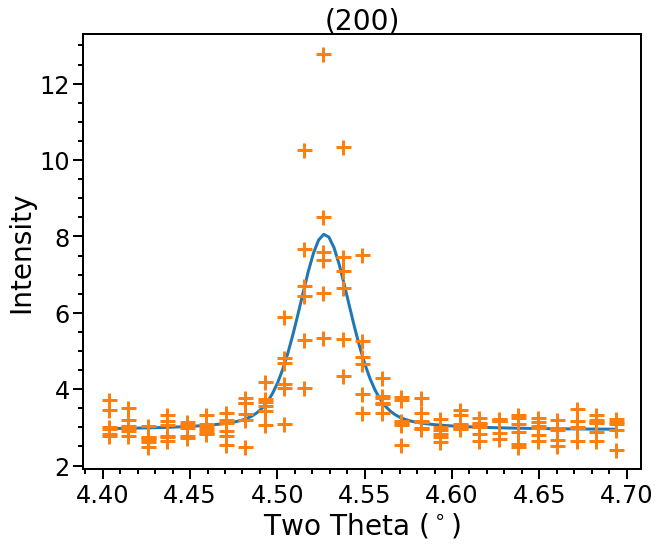

In [31]:
# reflection='(0002),(110),(10-11)'
reflection='(200)'

fit_number=0

fit_line=saved_list[fit_number][reflection]['lines_dict']
int_data=saved_list[fit_number][reflection]['data_dict']

plot_fit_saved_data(reflection,fit_line,int_data)

### Prefix for saving the plots

In [317]:
save_number = '041'

### Colour code for plots

Rainbow colour scheme with decreasing lattice plane spacing (ok for single-phase):

In [151]:
plane_colour = {
'(10-10)' : '#DE1E44', #red
'(0002)' : '#FF8D1D', #orange
'(10-11)' : '#FFDE27', #yellow
'(10-12)' : '#B2FF33', #light green
'(11-20)' : '#3cb44b', #green
'(10-13)' : '#1B1BFF', #blue
'(20-20)' : '#338DFF', #light blue (not used)
'(11-22)' : '#672695', #purple
'(20-21)' : '#E933FF', #magenta
'(110)' : 'black', #black
'(200)' : '#808080', #grey
'(211)' : '#000075', #navy (not used)
'(220)' : 'lightgrey', #light grey
}
print (plane_colour['(10-10)'])

#DE1E44


Adjusted colour scheme from https://learnui.design/tools/data-color-picker.html#palette (better for dual-phase):

In [152]:
plane_colour = {
'(10-10)' : '#de425b', #red
'(0002)' : '#ea714e', #orange
'(10-11)' : '#f7a258', #light orange
'(10-12)' : '#fdd172', #yellow
'(11-20)' : '#c2e38c', #light green
'(10-13)' : '#88c580', #light green
'(20-20)' : 'magenta', #(not used)
'(11-22)' : '#51a676', #green
'(20-21)' : '#488f31', #dark green
'(110)' : '#004c6d', #dark blue
'(200)' : '#6996b3', #blue
'(211)' : 'magenta', #(not used)
'(220)' : '#c1e7ff', #light blue
}
print (plane_colour['(10-10)'])

#de425b


Adjusting colours from above to make the 11-20 stand out;

In [153]:
plane_colour = {
'(10-10)' : '#de425b', #red
'(0002)' : '#ea714e', #orange
'(10-11)' : '#f7a258', #light orange
'(10-12)' : '#fdd172', #yellow
'(11-20)' : '#488f31', #dark green
'(10-13)' : '#51a676', #green
'(20-20)' : 'magenta', #(not used)
'(11-22)' : '#88c580', #light green
'(20-21)' : '#c2e38c', #light green
'(110)' : '#004c6d', #dark blue
'(200)' : '#6996b3', #blue
'(211)' : 'magenta', #(not used)
'(220)' : '#c1e7ff', #light blue
}
print (plane_colour['(10-10)'])

#de425b


### Best Colour Scheme

Alpha Phase - Viridis colour scheme, discretised using python code 

Beta Phase - Adjusted colour scheme from https://learnui.design/tools/data-color-picker.html#palette with 7 colours chosen:

In [318]:
plane_colour = {
'(10-10)' : '#fde725',
'(0002)' : '#addc30',
'(10-11)' : '#5ec962',
'(10-12)' : '#28ae80',
'(11-20)' : '#21918c',
'(10-13)' : '#2c728e',
'(20-20)' : '#3b528b',
'(11-22)' : '#472d7b',
'(20-21)' : '#440154',
'(110)' : '#ff764a',
'(200)' : '#ef5675',
'(211)' : '#bc5090',
'(220)' : '#ffa600',
}
print (plane_colour['(10-10)'])

#fde725


### Markers for plots

In [319]:
plane_marker = {
'(10-10)' : 's', #square
'(0002)' : 'H', #hexagon
'(10-11)' : '^', #ltriangle - up
'(10-12)' : 'v', #ytriangle - down
'(11-20)' : 'D', #diamond
'(10-13)' : '<', #triangle - left
'(20-20)' : 'd', #(not used) thin diamond
'(11-22)' : '*', #star
'(20-21)' : 'o', #circle
'(110)' : '+', #plus
'(200)' : 'x', #cross
'(211)' : '1', #tri_down
'(220)' : 'P', #plus (filled)
}
print (plane_marker['(10-10)'])

s


### Extracting peak centres

#### Single peaks

If there are only $\textbf{single peaks}$, then extract peak centres and plot (note, if there are $\textbf{double and triple peaks}$ in the data then this will lead to an error):

In [209]:
peak_centres=dict()

fit_number=0

for reflection in saved_list[fit_number].keys():
    peak_centres[reflection]=[]
 
    for i, lattice_plane in enumerate(saved_list):
        ttheta=saved_list[i][reflection]['params_values']['center']
        peak_centres[reflection].append(ttheta)

KeyError: 'center'

KeyError: '(0002),(110),(10-11)'

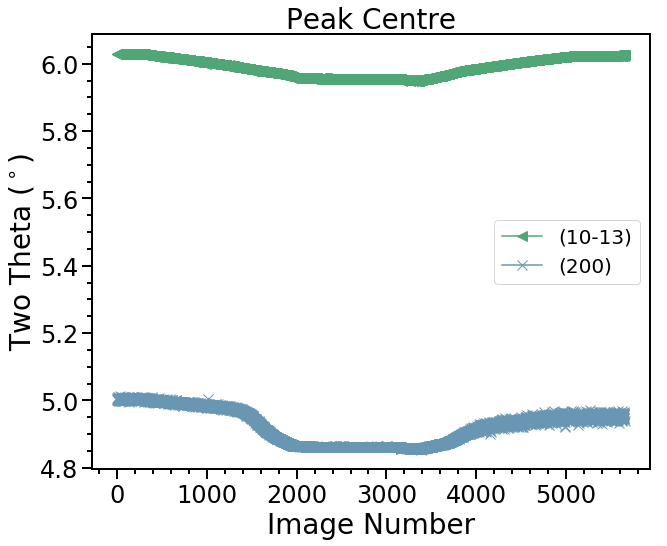

In [210]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in saved_list[fit_number].keys():
    
    plt.plot(peak_centres[reflection],marker=plane_marker[reflection],color=plane_colour[reflection],markersize=10,label=reflection)
    plt.legend()
    plt.title('Peak Centre', fontsize=28)
    plt.ylabel(r'Two Theta ($^\circ$)', fontsize=28)
    plt.xlabel('Image Number', fontsize=28)

#### Double and triple peaks

If there are $\textbf{double and triple peaks}$ in the data then extracting the peak centres is slightly more difficult:

In [320]:
#check the reflections stored for an image number where you know all peaks have been fitted
fit_number=0
for key in saved_list[fit_number].keys():
    print(key)

(10-10)
(11-22),(20-21)
(10-12)
(200)
(0002),(110),(10-11)
(11-20)
(10-13),(211)


In [321]:
# peak_list='(10-10)','(0002)','(110)','(10-11)','(10-12)','(200)','(11-20)','(10-13)','(211)','(20-20)','(11-22)','(20-21)'
peak_list='(10-10)','(0002)','(110)','(10-11)','(10-12)','(200)','(11-20)','(10-13)','(211)','(11-22)','(20-21)'
print(peak_list)

('(10-10)', '(0002)', '(110)', '(10-11)', '(10-12)', '(200)', '(11-20)', '(10-13)', '(211)', '(11-22)', '(20-21)')


In [322]:
#manually define the reflection keys for single peaks in a new dictionary for the peak centres
peak_centres=dict()

peak_centres['(10-10)']=[]
peak_centres['(10-12)']=[]
peak_centres['(200)']=[]
peak_centres['(11-20)']=[]
# peak_centres['(10-13)']=[]

for single_reflection in peak_centres.keys():
    print(single_reflection)
    
for single_reflection in peak_centres.keys():
    for i, lattice_plane in enumerate (saved_list):    
        ttheta=saved_list[i][single_reflection]['params_values']['center']
        peak_centres[single_reflection].append(ttheta)

(200)
(10-10)
(11-20)
(10-12)


In [323]:
#manually define the reflection keys for double and triple peaks
peak_centres['(0002)']=[]
peak_centres['(110)']=[]
peak_centres['(10-11)']=[]
peak_centres['(11-22)']=[]
peak_centres['(20-21)']=[]
peak_centres['(10-13)']=[]
peak_centres['(211)']=[]
# peak_centres['(0004)']=[]
# peak_centres['(220)']=[]

for i, lattice_plane in enumerate(saved_list):    
    ttheta=saved_list[i]['(0002),(110),(10-11)']['params_values']['pv_1center']
    peak_centres['(0002)'].append(ttheta)
    ttheta=saved_list[i]['(0002),(110),(10-11)']['params_values']['pv_2center']
    peak_centres['(110)'].append(ttheta)
    ttheta=saved_list[i]['(0002),(110),(10-11)']['params_values']['pv_3center']
    peak_centres['(10-11)'].append(ttheta)

    ttheta=saved_list[i]['(11-22),(20-21)']['params_values']['pv_1center']
    peak_centres['(11-22)'].append(ttheta)
    ttheta=saved_list[i]['(11-22),(20-21)']['params_values']['pv_2center']
    peak_centres['(20-21)'].append(ttheta)
    
    ttheta=saved_list[i]['(10-13),(211)']['params_values']['pv_1center']
    peak_centres['(10-13)'].append(ttheta)
    ttheta=saved_list[i]['(10-13),(211)']['params_values']['pv_2center']
    peak_centres['(211)'].append(ttheta)
    
    #need to enter the image number for peak 220 to start from
    #use i+2 since i starts at zero and it needs to be greater than the image number
#     if i+2>1700:
#         ttheta=saved_list[i]['(0004),(220)']['params_values']['pv_2center']
#         peak_centres['(220)'].append(ttheta)

In [324]:
#define the image_number from the list
image_number=[]
for i, lattice_plane in enumerate (saved_list):
    image_number.append(i+1)

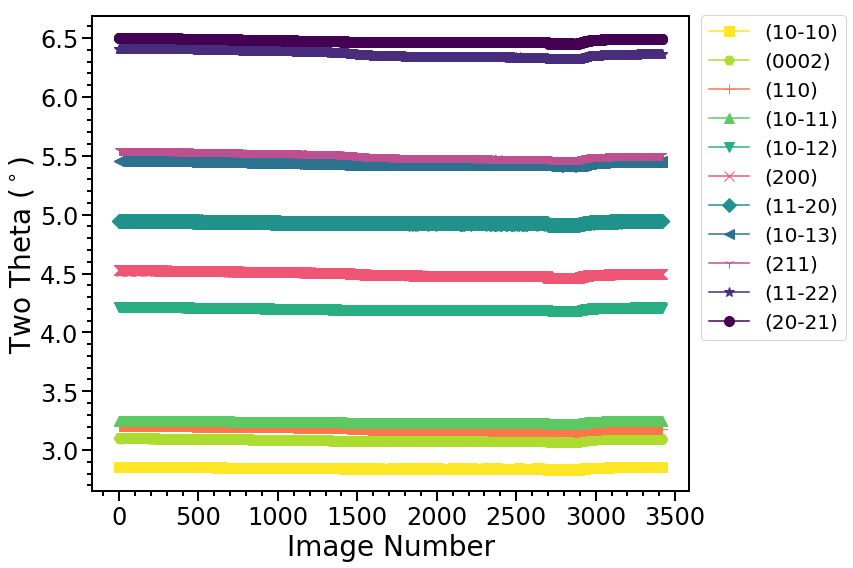

In [325]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in peak_list:
# for reflection in peak_centres.keys():
#     if reflection != '(200)' and reflection !='(0004)' and reflection !='(220)' and reflection !='(110)':
    plt.plot(image_number,peak_centres[reflection],marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
    plt.legend(loc=1, bbox_to_anchor=(1.28,1.025))
#     plt.title('Peak Centre', fontsize=28)
    plt.ylabel(r'Two Theta ($^\circ$)', fontsize=28)
    plt.xlabel('Image Number', fontsize=28)
#     if reflection == '(110)':
#         #plot up to the image number that peak was still fitted up until to 
#         plt.plot(image_number,peak_centres[reflection],marker=plane_marker[reflection],color=plane_colour[reflection],markersize=10,label=reflection)
#         plt.legend()
#     if reflection == '(200)':
#         #plot up to the image number that peak was still fitted up until to 
# #         plt.plot(image_number[0:4200],peak_centres[reflection][0:4200],marker=plane_marker[reflection],markersize=10,label=reflection)
#         plt.plot(image_number,peak_centres[reflection],marker=plane_marker[reflection],color=plane_colour[reflection],markersize=10,label=reflection)
#         plt.legend()
#     if reflection == '(220)':
#         #plot from (start-1):(end-1) for 220 peak
#         plt.plot(image_number[1699:5657],peak_centres[reflection],marker=plane_marker[reflection],color=plane_colour[reflection],markersize=10,label=reflection)
#         plt.legend()
        
    plt.tight_layout()
    plot_name=save_number+'_Peak_Centre'
    plt.savefig(plot_name, bbox_inches='tight')

### Plotting d-spacing

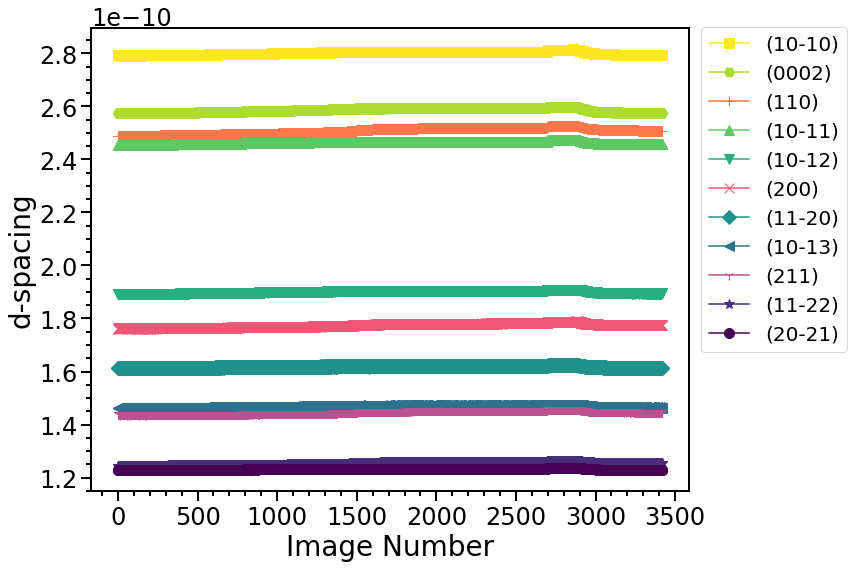

In [326]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in peak_list:
# for reflection in peak_centres.keys():
    d_spacing=calc_dspacing(peak_centres[reflection])
#     if reflection != '(200)' and reflection !='(0004)' and reflection !='(220)' and reflection !='(110)':
    plt.plot(image_number,d_spacing,marker=plane_marker[reflection],color=plane_colour[reflection],markersize=10,label=reflection)
    plt.legend(loc=1, bbox_to_anchor=(1.28,1.025))
#     plt.title('Peak d-spacing', fontsize=28)
    plt.ylabel('d-spacing',fontsize=28)
    plt.xlabel('Image Number',fontsize=28)
#     if reflection == '(110)':
#         plt.plot(image_number,d_spacing,marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()
#     if reflection == '(200)':
#         #plot up to the image number that peak was still fitted up until to 
# #         plt.plot(image_number[0:4200],d_spacing[0:4200],'-o',markersize=10,markerfacecolor='None',color=plane_colour[reflection],label=reflection)
#         plt.plot(image_number,d_spacing,marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()
#     if reflection == '(220)':
#         #plot from (start-1):(end-1) for 220 peak
#         plt.plot(image_number[1699:5657],d_spacing,marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()
        
    plt.tight_layout()
    plot_name=save_number+'_d-spacing'
    plt.savefig(plot_name, bbox_inches='tight')

### Converting image number to time

Images recorded at 10Hz acquisition frequency, so an image is recorded every 1/10th of a second.

In [327]:
#for 5657 images, put in 565.8 (i.e. i+1/10)...

image_time=np.arange(0.1,341.9,0.1)
# image_time=np.arange(0.1,1.1,0.1)

#can now replace anywhere with image_number with time to plot results against time

### Calculating and Plotting Strain

Use the same calc_strain function as above, only alter how we find the reflections.
Don't forget to check with and without the medfilt filter.

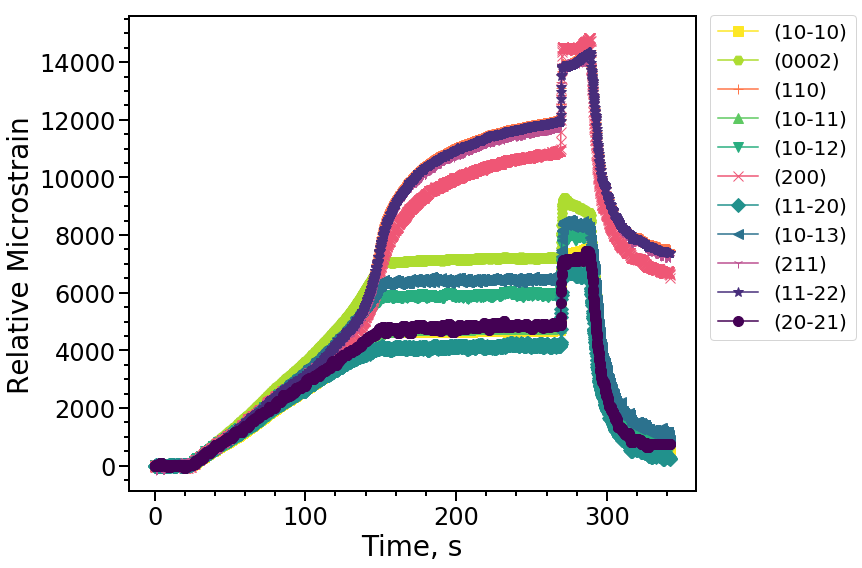

In [328]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in peak_list:
# for reflection in peak_centres.keys():
#     if reflection !='(200)' and reflection !='(0004)' and reflection !='(220)' and reflection !='(110)':
    # to be more selective about the peaks we are looking at
    
#     if reflection !='(200)' and reflection !='(0004)' and reflection !='(220)' and reflection !='(110)' \
#     and reflection !='(10-12)' and reflection !='(10-13)' and reflection !='(11-22)' and reflection !='(20-21)':

    if reflection !='(20-20)':
        
        strain=calc_strain(peak_centres[reflection])*1e6
        strain = medfilt(strain,15)
        #can remove image_number here if not previously defined
#         plt.plot(image_number,strain,marker=plane_marker[reflection],label=reflection)
        plt.plot(image_time,strain,marker=plane_marker[reflection],color=plane_colour[reflection],markersize=10,label=reflection)
        plt.legend(loc=1, bbox_to_anchor=(1.3,1.025))
#         plt.title('Peak strain',fontsize=28)
        plt.ylabel('Relative Microstrain',fontsize=28)
#         plt.xlabel('Image',fontsize=28)
        plt.xlabel('Time, s',fontsize=28)
#         plt.xlim(0,565.8)
#         plt.ylim(0,35000)
        plt.tight_layout()
#     if reflection =='(110)':
#         strain=calc_strain(peak_centres[reflection])*1e6
#         strain = medfilt(strain,15)
# #         plt.plot(image_number,strain,marker=plane_marker[reflection],label=reflection)
#         plt.plot(image_time,strain,marker=plane_marker[reflection],color=plane_colour[reflection], markersize =10,label=reflection)
#         plt.legend()    
#     if reflection =='(200)': 
#         strain=calc_strain(peak_centres[reflection])*1e6
#         strain = medfilt(strain,15)
# #         plt.plot(image_number[0:4200],strain[0:4200],marker=plane_marker[reflection],label=reflection)
# #         plt.plot(image_time[0:4200],strain[0:4200],marker=plane_marker[reflection], markersize=10,label=reflection)
#         plt.plot(image_time, strain,marker=plane_marker[reflection], color=plane_colour[reflection],markersize=10,label=reflection)
#         plt.legend()
#     if reflection =='(220)':
#         strain=calc_strain(peak_centres[reflection])*1e6
#         strain = medfilt(strain,5)
#         plt.plot(image_number[1699:5657],strain,marker=plane_marker[reflection],label=reflection)
#         plt.legend()
     
    plt.tight_layout()
    plot_name=save_number+'_Rel_Microstrain'
    plt.savefig(plot_name, bbox_inches='tight')

### FWHM

#### Single peaks

If there are only $\textbf{single peaks}$, then extract peak centres and plot:

In [221]:
fit_number=0

peak_fwhm=dict()

for reflection in saved_list[fit_number].keys():
    peak_fwhm[reflection]=[]
        
    for i, lattice_plane in enumerate(saved_list):
        ttheta=saved_list[i][reflection]['params_values']['fwhm']
        peak_fwhm[reflection].append(ttheta)

KeyError: 'fwhm'

KeyError: '(0002),(110),(10-11)'

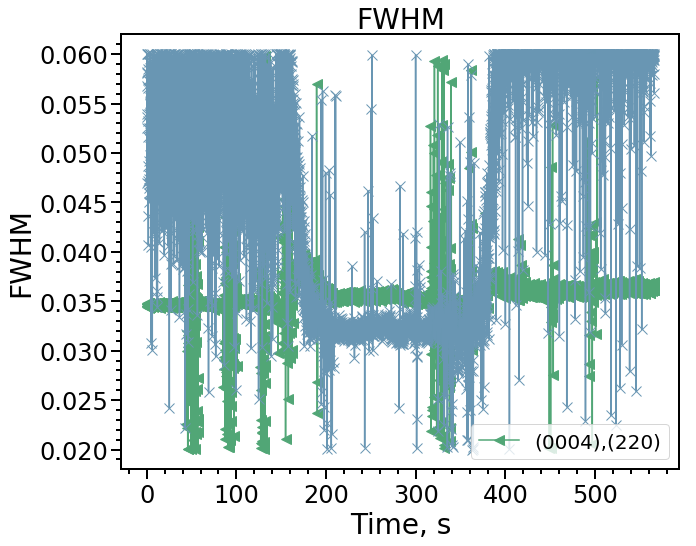

In [222]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in saved_list[fit_number].keys():
    plt.plot(image_time,peak_fwhm[reflection],marker=plane_marker[reflection],color=plane_colour[reflection],markersize=10)
    plt.legend(fit.reflection_list)
    plt.ylabel('FWHM',fontsize=28)
    plt.xlabel('Time, s',fontsize=28)
    plt.title('FWHM', fontsize=28)

In [ ]:
for reflection in fit.reflection_list:
    plt.plot(medfilt(peak_fwhm[reflection],5),marker=plane_marker[reflection],color=plane_colour[reflection],markersize=10)
    plt.legend(fit.reflection_list)
    plt.ylabel('FWHM',fontsize=28)
    plt.xlabel('Time, s',fontsize=28)
    plt.title('FWHM', fontsize=28)

#### Double and triple peaks

If there are $\textbf{double and triple peaks}$ in the data then extracting the peak centres is slightly more difficult:

In [329]:
#manually define the reflection keys for single peaks in a new dictionary for the peak centres
peak_fwhm=dict()

peak_fwhm['(10-10)']=[]
peak_fwhm['(10-12)']=[]
peak_fwhm['(200)']=[]
peak_fwhm['(11-20)']=[]
# peak_fwhm['(10-13)']=[]
    
for single_reflection in peak_fwhm.keys():
    for i, lattice_plane in enumerate(saved_list):    
        ttheta=saved_list[i][single_reflection]['params_values']['fwhm']
        peak_fwhm[single_reflection].append(ttheta)

In [330]:
#manually define the reflection keys for double and triple peaks
peak_fwhm['(0002)']=[]
peak_fwhm['(110)']=[]
peak_fwhm['(10-11)']=[]
peak_fwhm['(11-22)']=[]
peak_fwhm['(20-21)']=[]
peak_fwhm['(10-13)']=[]
peak_fwhm['(211)']=[]
# peak_fwhm['(0004)']=[]
# peak_fwhm['(220)']=[]

for i, lattice_plane in enumerate(saved_list):    
    ttheta=saved_list[i]['(0002),(110),(10-11)']['params_values']['pv_1fwhm']
    peak_fwhm['(0002)'].append(ttheta)
    ttheta=saved_list[i]['(0002),(110),(10-11)']['params_values']['pv_2fwhm']
    peak_fwhm['(110)'].append(ttheta)
    ttheta=saved_list[i]['(0002),(110),(10-11)']['params_values']['pv_3fwhm']
    peak_fwhm['(10-11)'].append(ttheta)

    ttheta=saved_list[i]['(11-22),(20-21)']['params_values']['pv_1fwhm']
    peak_fwhm['(11-22)'].append(ttheta)
    ttheta=saved_list[i]['(11-22),(20-21)']['params_values']['pv_2fwhm']
    peak_fwhm['(20-21)'].append(ttheta)
    
    ttheta=saved_list[i]['(10-13),(211)']['params_values']['pv_1fwhm']
    peak_fwhm['(10-13)'].append(ttheta)
    ttheta=saved_list[i]['(10-13),(211)']['params_values']['pv_2fwhm']
    peak_fwhm['(211)'].append(ttheta)
    
#     #need to enter the image number for peak 220 to start from
#     #use i+2 since i starts at zero and it needs to be greater than the image number
#     if i+2>1700:
#         ttheta=saved_list[i]['(0004),(220)']['params_values']['pv_2fwhm']
#         peak_fwhm['(220)'].append(ttheta)

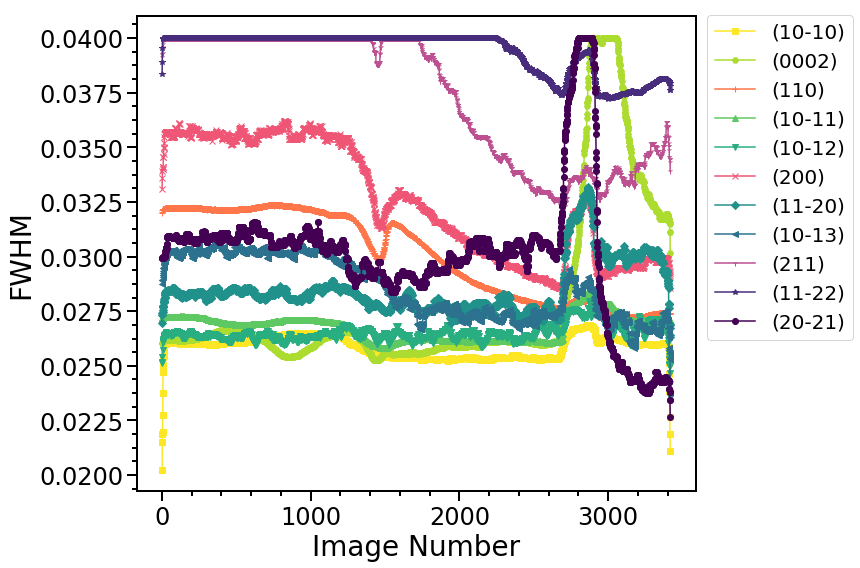

In [331]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in peak_list:
# for reflection in peak_fwhm.keys():
    if reflection!='(20-20)':
#     if reflection != '(200)' and reflection !='(0004)' and reflection !='(220)' and reflection !='(110)':
        plt.plot(image_number,medfilt(peak_fwhm[reflection],51),marker=plane_marker[reflection],color=plane_colour[reflection],label=reflection)
        plt.legend(loc=1, bbox_to_anchor=(1.3,1.025))
#         plt.title('FWHM',fontsize=28)
        plt.ylabel('FWHM',fontsize=28)
        plt.xlabel('Image Number',fontsize=28)
#     if reflection == '(110)':
#         plt.plot(image_number,medfilt(peak_fwhm[reflection],15),marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()   
#     if reflection == '(200)':
#         #plot up to the image number that peak was still fitted up until to 
# #         plt.plot(image_number[0:4200],medfilt(peak_fwhm[reflection][0:4200],15)[0:4200],'-o',markersize=10,markerfacecolor='None',label=reflection)
#         plt.plot(image_number,medfilt(peak_fwhm[reflection],15),marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()
#     if reflection == '(220)':
#         #plot from (start-1):(end-1) for 220 peak
#         plt.plot(image_number[1699:5657],medfilt(peak_fwhm[reflection],15),marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()
        
        plt.tight_layout()
    
    plt.tight_layout()
    plot_name=save_number+'_FWHM'
    plt.savefig(plot_name, bbox_inches='tight')

### Peak Intensity (Amplitude)

In [332]:
#manually define the reflection keys for single peaks in a new dictionary for the peak centres
peak_amplitude=dict()

peak_amplitude['(10-10)']=[]
peak_amplitude['(10-12)']=[]
peak_amplitude['(200)']=[]
peak_amplitude['(11-20)']=[]
# peak_amplitude['(10-13)']=[]
    
for single_reflection in peak_amplitude.keys():
    for i, lattice_plane in enumerate(saved_list):    
        ttheta=saved_list[i][single_reflection]['params_values']['amplitude']
        peak_amplitude[single_reflection].append(ttheta)

In [333]:
#manually define the reflection keys for double and triple peaks
peak_amplitude['(0002)']=[]
peak_amplitude['(110)']=[]
peak_amplitude['(10-11)']=[]
peak_amplitude['(11-22)']=[]
peak_amplitude['(20-21)']=[]
peak_amplitude['(10-13)']=[]
peak_amplitude['(211)']=[]
# peak_amplitude['(0004)']=[]
# peak_amplitude['(220)']=[]

for i, lattice_plane in enumerate(saved_list):    
    ttheta=saved_list[i]['(0002),(110),(10-11)']['params_values']['pv_1amplitude']
    peak_amplitude['(0002)'].append(ttheta)
    ttheta=saved_list[i]['(0002),(110),(10-11)']['params_values']['pv_2amplitude']
    peak_amplitude['(110)'].append(ttheta)
    ttheta=saved_list[i]['(0002),(110),(10-11)']['params_values']['pv_3amplitude']
    peak_amplitude['(10-11)'].append(ttheta)

    ttheta=saved_list[i]['(11-22),(20-21)']['params_values']['pv_1amplitude']
    peak_amplitude['(11-22)'].append(ttheta)
    ttheta=saved_list[i]['(11-22),(20-21)']['params_values']['pv_2amplitude']
    peak_amplitude['(20-21)'].append(ttheta)
    
    ttheta=saved_list[i]['(10-13),(211)']['params_values']['pv_1amplitude']
    peak_amplitude['(10-13)'].append(ttheta)
    ttheta=saved_list[i]['(10-13),(211)']['params_values']['pv_2amplitude']
    peak_amplitude['(211)'].append(ttheta)
    
#     #need to enter the image number for peak 220 to start from
#     #use i+2 since i starts at zero and it needs to be greater than the image number
#     if i+2>1700:
#         ttheta=saved_list[i]['(0004),(220)']['params_values']['pv_2amplitude']
#         peak_amplitude['(220)'].append(ttheta)

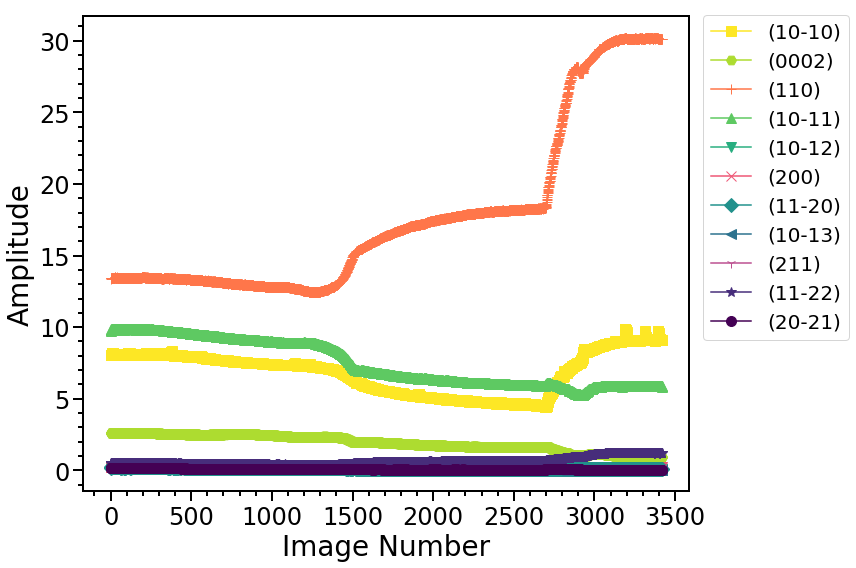

In [334]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in peak_list:
# for reflection in peak_amplitude.keys():
    if reflection != '(20-20)':
#     if reflection != '(200)' and reflection !='(0004)' and reflection !='(220)' and reflection !='(110)':
        plt.plot(image_number,medfilt(peak_amplitude[reflection],15),marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
        plt.legend(loc=1, bbox_to_anchor=(1.28,1.025))
#         plt.title('Peak Amplitude',fontsize=28)
        plt.ylabel('Amplitude',fontsize=28)
        plt.xlabel('Image Number',fontsize=28)       
#     if reflection == '(110)':
#         plt.plot(image_number,medfilt(peak_amplitude[reflection],15),marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()
#     if reflection == '(200)':
#         #plot up to the image number that peak was still fitted up until to 
# #         plt.plot(image_number[0:4200],medfilt(peak_amplitude[reflection][0:4200],15)[0:4200],marker=plane_marker[reflection],markersize=10, label=reflection)
#         plt.plot(image_number,medfilt(peak_amplitude[reflection],15),marker=plane_marker[reflection],markersize=10, color=plane_colour[reflection],label=reflection)
#         plt.legend()
#     if reflection == '(220)':
#         #plot from (start-1):(end-1) for 220 peak
#         plt.plot(image_number[1699:5657],medfilt(peak_amplitude[reflection],15),marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()
    
    plt.tight_layout()
    plot_name=save_number+'_Peak_Amplitude'
    plt.savefig(plot_name, bbox_inches='tight')

## Load mechanical data from file

In [335]:
mechFilePrefix = "Data/"+filePrefix

firstFile = 1
lastFile = 3418

mechData = np.loadtxt(mechFilePrefix + '.dat', skiprows=6)

dataLoad = mechData[firstFile-1:lastFile, 1]
dataTemp = mechData[firstFile-1:lastFile, 2]
dataPosn = mechData[firstFile-1:lastFile, 3]

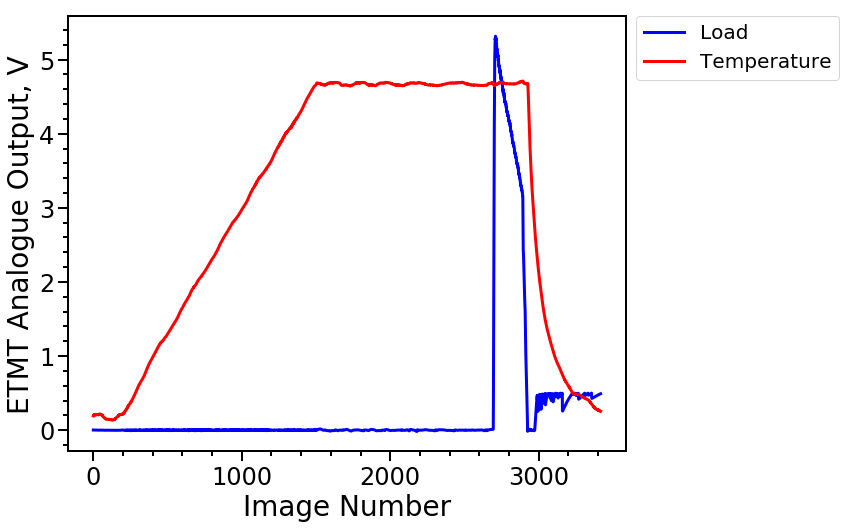

In [336]:
plt.figure(figsize=(10,8))
plt.minorticks_on()
plt.plot(dataLoad, linewidth=3, label='Load',color='blue')
plt.plot(dataTemp, linewidth=3, label='Temperature', color='red')
plt.legend(loc=1, bbox_to_anchor=(1.4,1.025))
plt.ylabel('ETMT Analogue Output, V', fontsize=28)
plt.xlabel('Image Number', fontsize=28)

200


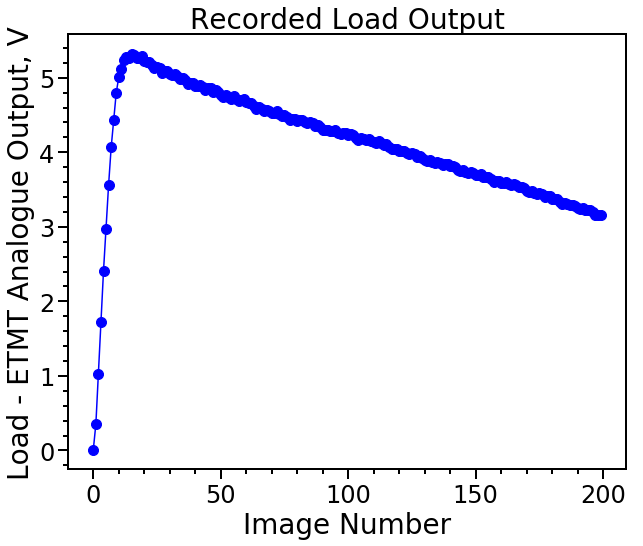

In [337]:
#note the start and end image values for the deformation from the previous image
start=2694
end=2894
length=end-start

print(length)

plt.figure(figsize=(10,8))
plt.minorticks_on()

plt.plot(dataLoad[start:end],'-o',color='blue',markersize=10)
plt.title('Recorded Load Output', fontsize=28)
plt.ylabel('Load - ETMT Analogue Output, V', fontsize=28)
plt.xlabel('Image Number', fontsize=28)

Now, look at the true stress-strain data recorded on the ETMT. True stress and strain are calculated using the resistance method. The data has already been reduced to start at the point of applied load.

In [338]:
etmtFilePrefix = "Data/ETMT/041"

firstPoint = 1
lastPoint = 1500

etmtData = np.loadtxt(etmtFilePrefix + '.txt', delimiter=',', skiprows=1)

dataLoadetmt = etmtData[firstPoint-1:lastPoint, 0]
dataStrain = etmtData[firstPoint-1:lastPoint, 3]
dataStress = etmtData[firstPoint-1:lastPoint, 4]

#some filtering of the data is needed due to fluctuations in the ETMT data
filtStrain=medfilt(dataStrain,45)
filtStress=medfilt(dataStress,45)

ETMT records 5 data points for each tiff image -> 50HZ acquisition frequency

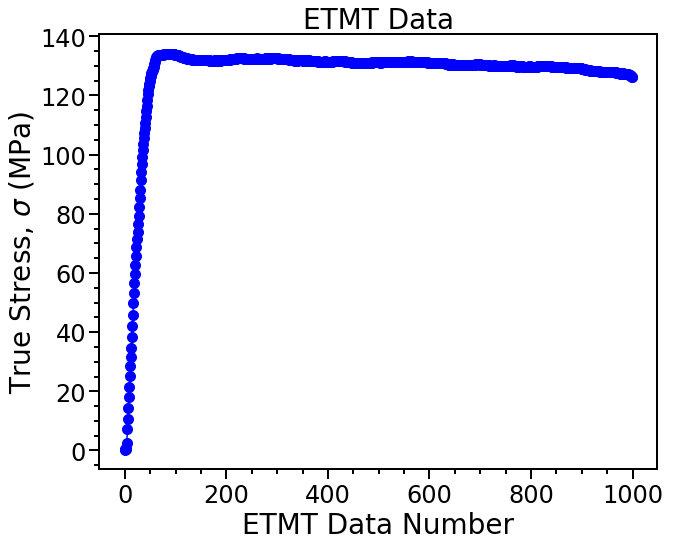

In [339]:
#adjust the end data number as appropriate (note, it should be 5x the image number above)
end_etmt=1000

plt.figure(figsize=(10,8))
plt.minorticks_on()

plt.plot(filtStress[0:end_etmt],'-o', color='blue',markersize=10)
plt.title('ETMT Data', fontsize=28)
plt.ylabel('True Stress, ${\sigma}$ (MPa)',fontsize=28)
plt.xlabel('ETMT Data Number',fontsize=28)

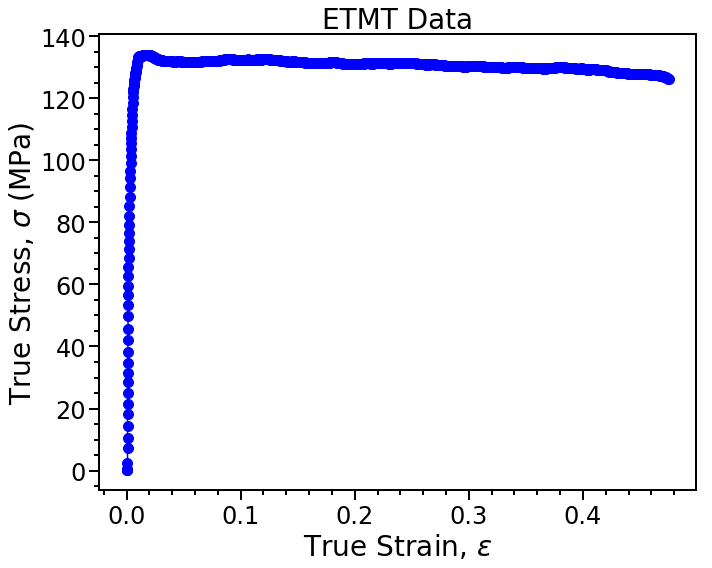

In [340]:
#note the end data number
end_etmt=1000

plt.figure(figsize=(10,8))
plt.minorticks_on()
plt.plot(filtStrain[0:end_etmt],filtStress[0:end_etmt],'-o',color='blue', markersize=10)
plt.title('ETMT Data', fontsize=28)
plt.ylabel('True Stress, ${\sigma}$ (MPa)',fontsize=28)
plt.xlabel('True Strain, ${\epsilon}$',fontsize=28)

plt.tight_layout()
plot_name=save_number+'_TrueStressStrain'
plt.savefig(plot_name, bbox_inches='tight')

#ETMT records 5 data points for each tiff image -> 50HZ acquisition frequency

Finally, filter the data so every point on the ETMT true stress-strain curve matches the diffraction images.

In [341]:
trueStrain=np.empty([length,])
trueStress=np.empty([length,])

for i in range(0,length):
    trueStrain[i]=filtStrain[i*5]
    trueStress[i]=filtStress[i*5]

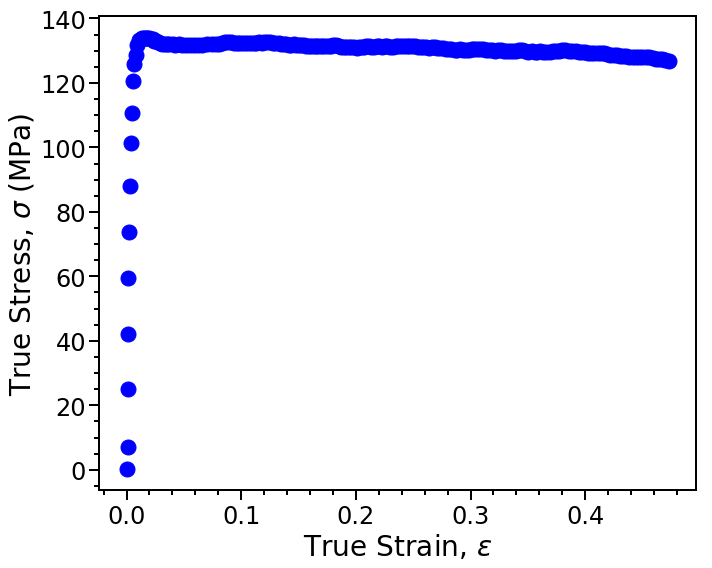

In [342]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

plt.plot(trueStrain, trueStress, 'o',color='blue', markersize=15)
#plt.title('ETMT Data at Adjusted Frequency',fontsize=28)
plt.ylabel('True Stress, $\sigma$ (MPa)',fontsize=28)
plt.xlabel('True Strain, $\epsilon$', fontsize=28)

plt.tight_layout()
plot_name=save_number+'_Red_TrueStressStrain'
plt.savefig(plot_name, bbox_inches='tight')

### Plotting Microstrain with True Stress and True Strain

Note, there is slight delay in the ETMT trace compared with the load/temp data recorded with the diffraction images, with a lag of 2/10ths second.

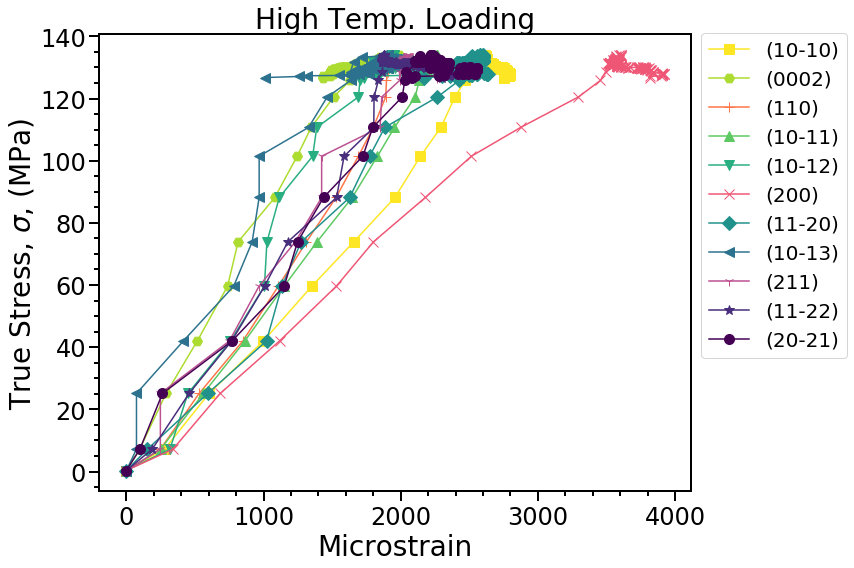

In [343]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in peak_list:
# for reflection in peak_centres.keys():
    if reflection != '(20-20)':
#     if reflection !='(200)' and reflection !='(0004)' and reflection !='(220)' and reflection !='(110)':
        # -2 from start and end values since no microstrain at image 3159 (but this starts at image 1)
        # whereas ETMT trace starts at 0 and shows load applied at image 3160 (slight delay in recording of 2)
        strain=calc_strain_singlepoint(peak_centres[reflection][(start-2):(end-2)])*1e6
        strain = medfilt(strain,15)
        plt.plot(strain,trueStress,marker=plane_marker[reflection],color=plane_colour[reflection],markersize=10,label=reflection)
        plt.legend(loc=1, bbox_to_anchor=(1.28,1.025))
        plt.title('High Temp. Loading',fontsize=28)
        plt.ylabel('True Stress, ${\sigma}$, (MPa)', fontsize=28)
        plt.xlabel('Microstrain',fontsize=28)

#     if reflection =='(110)' or reflection =='(200)':
#         strain=calc_strain_singlepoint(peak_centres[reflection][(start-2):(end-2)])*1e6
#         strain = medfilt(strain,15)
#         plt.plot(strain,trueStress,marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()    
#     if reflection =='(220)':
#         # 220 peak had to be started later so -1700 to start at zero, then -2 as it lags the ETMT
#         strain=calc_strain_singlepoint(peak_centres[reflection][(start-1701):(end-1701)])*1e6
#         strain = medfilt(strain,5)
#         plt.plot(strain,trueStress,marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()
    
    plt.tight_layout()
    plot_name=save_number+'_Microstrain_TrueStress_All'
    plt.savefig(plot_name, bbox_inches='tight')

Reduce the number of points and reduce the number of lattice plane peaks:

In [344]:
peak_list2='(10-10)','(0002)','(10-11)','(11-20)','(110)','(200)','(211)'

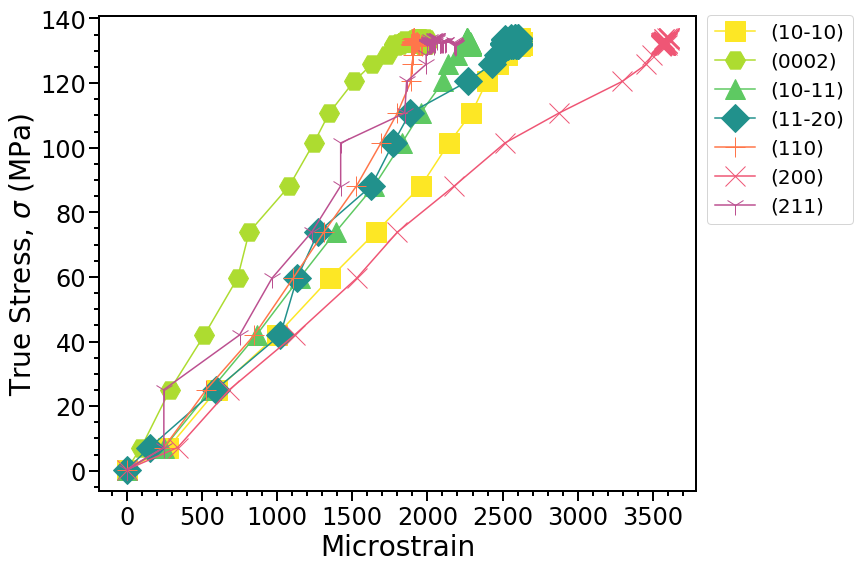

In [345]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in peak_list2:
#for reflection in peak_centres.keys():
    if reflection !='(0004)' \
    and reflection !='(10-12)' and reflection !='(10-13)' and reflection !='(11-22)' and reflection !='(20-21)':
        # -2 from start and end values as see no microstrain at image 3159 (but this starts at image 1)
        # whereas ETMT trace starts at 0 and shows load applied at image 3160 (slight delay in recording of 2)
        strain=calc_strain_singlepoint(peak_centres[reflection][(start-2):(end-2)])*1e6
        strain = medfilt(strain,15)
        #reduce the number of points here to capture the initial yield behaviour
        plt.plot(strain[0:75],trueStress[0:75],marker=plane_marker[reflection],color=plane_colour[reflection],markersize=20,label=reflection)
        plt.legend(loc=1, bbox_to_anchor=(1.28,1.025))
#         plt.legend(loc=1, bbox_to_anchor=(1.28,0.9))
#         plt.title('High Temp. Loading',fontsize=28)
        plt.ylabel('True Stress, ${\sigma}$ (MPa)',fontsize=28)
        plt.xlabel('Microstrain',fontsize=28)
#         plt.xlim(-40,1600)
#         plt.ylim(-2,60)

#     if reflection =='(110)' or reflection =='(200)':
#         strain=calc_strain_singlepoint(peak_centres[reflection][(start-2):(end-2)])*1e6
#         strain = medfilt(strain,15)
#         plt.plot(strain[0:20],trueStress[0:20],marker=plane_marker[reflection],color=plane_colour[reflection],markersize=20, label=reflection)
        #plt.legend()    
#     if reflection =='(220)':
#         # 220 peak had to be started later so -1700 to start at zero, then -2 as it lags the ETMT
#         strain=calc_strain_singlepoint(peak_centres[reflection][(start-1701):(end-1701)])*1e6
#         strain = medfilt(strain,5)
#         plt.plot(strain[0:20],trueStress[0:20],marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()

#     plt.xlim(-40,1600)
#     plt.ylim(-2,60)

    plt.tight_layout()
    plot_name=save_number+'_Microstrain_TrueStress_Red'
    plt.savefig(plot_name, bbox_inches='tight')

Plotting microstrain versus true strain:

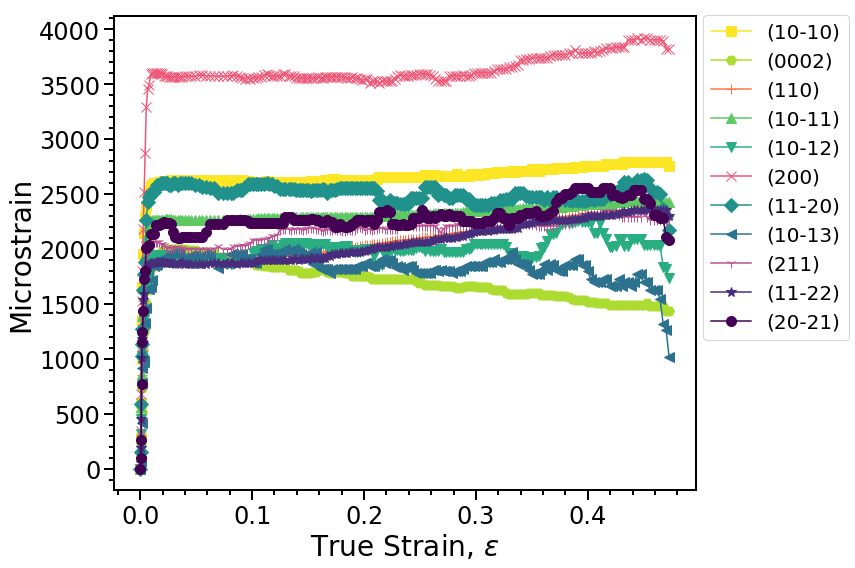

In [346]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in peak_list:
# for reflection in peak_centres.keys():
#     if reflection !='(200)' and reflection !='(0004)' and reflection !='(220)' and reflection !='(110)':
    # -2 from start and end values as see no microstrain at image 3159 (but this starts at image 1)
    # whereas ETMT trace starts at 0 and shows load applied at image 3160 (slight delay in recording of 2)
    strain=calc_strain_singlepoint(peak_centres[reflection][(start-2):(end-2)])*1e6
    strain = medfilt(strain,15)
    plt.plot(trueStrain, strain,marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
    plt.legend(loc=1, bbox_to_anchor=(1.28,1.025))
#     plt.title('High Temp. Loading', fontsize=28)
    plt.ylabel('Microstrain',fontsize=28)
    plt.xlabel('True Strain, ${\epsilon}$',fontsize=28)

#     if reflection =='(110)' or reflection =='(200)':
#         strain=calc_strain_singlepoint(peak_centres[reflection][(start-2):(end-2)])*1e6
#         strain = medfilt(strain,15)
#         plt.plot(trueStrain, strain,marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()    
#     if reflection =='(220)':
#         # 220 peak had to be started later so -1700 to start at zero, then -1 as it lags the ETMT
#         strain=calc_strain_singlepoint(peak_centres[reflection][(start-1701):(end-1701)])*1e6
#         strain = medfilt(strain,15)
#         plt.plot(trueStrain,strain,marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()
        
    plt.tight_layout()
    plot_name=save_number+'_Microstrain_TrueStrain_All'
    plt.savefig(plot_name, bbox_inches='tight')

Reduce the number of points to avoid end part of the test in which there is localised heating:

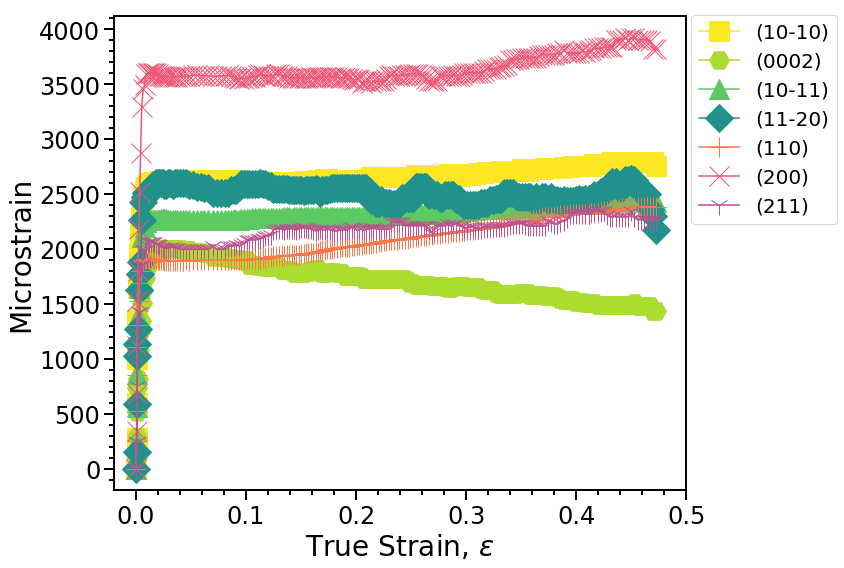

In [348]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in peak_list2:
# for reflection in peak_centres.keys():
#     if reflection !='(200)' and reflection !='(0004)' and reflection !='(220)' and reflection !='(110)' \
#     and reflection !='(10-12)' and reflection !='(10-13)' and reflection !='(11-22)' and reflection !='(20-21)':
    # -2 from start and end values as see no microstrain at image 3159 (but this starts at image 1)
    # whereas ETMT trace starts at 0 and shows load applied at image 3160 (slight delay in recording of 2)
    strain=calc_strain_singlepoint(peak_centres[reflection][(start-2):(end-2)])*1e6
    strain = medfilt(strain,15)
    plt.plot(trueStrain, strain,marker=plane_marker[reflection],color=plane_colour[reflection],markersize=20,label=reflection)
    plt.legend(loc=1, bbox_to_anchor=(1.28,1.025))
#     plt.title('High Temp. Loading',fontsize=28)
    plt.ylabel('Microstrain', fontsize=28)
    plt.xlabel('True Strain, ${\epsilon}$',fontsize=28)

#     if reflection =='(110)' or reflection =='(200)':
#         strain=calc_strain_singlepoint(peak_centres[reflection][(start-2):(end-2)])*1e6
#         strain = medfilt(strain,15)
#         plt.plot(trueStrain[0:100], strain[0:100],marker=plane_marker[reflection],markersize=20,color=plane_colour[reflection],label=reflection)
#         plt.legend()    
#     if reflection =='(220)':
#         # 220 peak had to be started later so -1700 to start at zero, then -1 as it lags the ETMT
#         strain=calc_strain_singlepoint(peak_centres[reflection][(start-1701):(end-1701)])*1e6
#         strain = medfilt(strain,15)
#         plt.plot(trueStrain[0:100],strain[0:100],marker=plane_marker[reflection],color=plane_colour[reflection],markersize=10,label=reflection)
#         #plt.legend()
#         plt.xticks(np.arange(min(trueStrain[0:100]), max(trueStrain[0:100])+1, 0.05))
    
    plt.xlim(-0.02,0.5)
#     plt.ylim(-100,2900)
    
    plt.tight_layout()
    plot_name=save_number+'_Microstrain_TrueStrain_Red'
    plt.savefig(plot_name, bbox_inches='tight')

## Plotting Amplitude

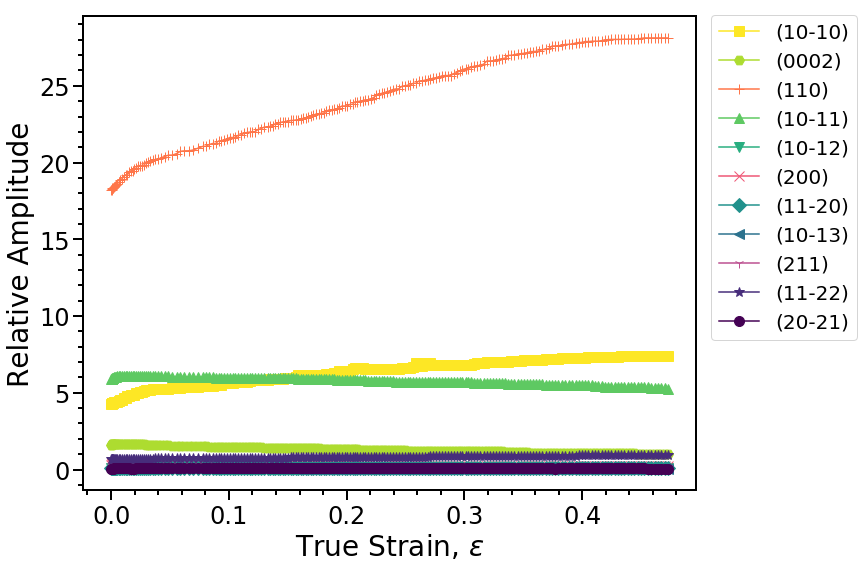

In [349]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in peak_list:
# for reflection in peak_centres.keys():
#     if reflection !='(200)' and reflection !='(0004)' and reflection !='(220)' and reflection !='(110)':
        # -2 from start and end values as see no microstrain at image 3159 (but this starts at image 1)
        # whereas ETMT trace starts at 0 and shows load applied at image 3160 (slight delay in recording of 2)
    amplitude=medfilt(peak_amplitude[reflection][(start-2):(end-2)],15)
#         amplitude=medfilt(amplitude,15)
    plt.plot(trueStrain, amplitude,marker=plane_marker[reflection],color=plane_colour[reflection], markersize=10,label=reflection)
    plt.legend(loc=1, bbox_to_anchor=(1.28,1.025))
#         plt.title('High Temp. Loading', fontsize=28)
    plt.ylabel('Relative Amplitude',fontsize=28)
    plt.xlabel('True Strain, ${\epsilon}$',fontsize=28)
#     if reflection =='(110)' or reflection =='(200)':
#         amplitude=relative_amplitude(medfilt(peak_amplitude[reflection][(start-2):(end-2)],15))
# #         amplitude=medfilt(amplitude,15)
#         plt.plot(trueStrain, amplitude,marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()
#     if reflection =='(220)':
#         # 220 peak had to be started later so -1700 to start at zero, then -1 as it lags the ETMT
#         amplitude=relative_amplitude(medfilt(peak_amplitude[reflection][(start-1701):(end-1701)],15))
# #         amplitude=medfilt(amplitude,15)
#         plt.plot(trueStrain, amplitude,marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection], label=reflection)
#         plt.legend()
        
    plt.tight_layout()
    plot_name=save_number+'_Amplitude_TrueStrain'
    plt.savefig(plot_name, bbox_inches='tight')

Plot relative amplitude versus true strain:

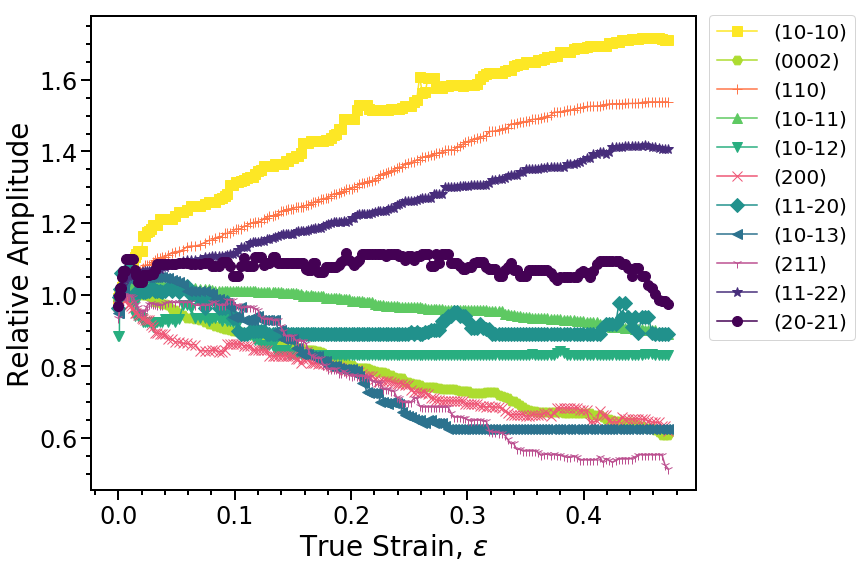

In [350]:
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in peak_list:
# for reflection in peak_centres.keys():
#     if reflection !='(200)' and reflection !='(0004)' and reflection !='(220)' and reflection !='(110)':
        # -2 from start and end values as see no microstrain at image 3159 (but this starts at image 1)
        # whereas ETMT trace starts at 0 and shows load applied at image 3160 (slight delay in recording of 2)
    amplitude=relative_amplitude(medfilt(peak_amplitude[reflection][(start-2):(end-2)],15))
#         amplitude=medfilt(amplitude,15)
    plt.plot(trueStrain, amplitude,marker=plane_marker[reflection],color=plane_colour[reflection], markersize=10,label=reflection)
    plt.legend(loc=1, bbox_to_anchor=(1.28,1.025))
#     plt.title('High Temp. Loading', fontsize=28)
    plt.ylabel('Relative Amplitude',fontsize=28)
    plt.xlabel('True Strain, ${\epsilon}$',fontsize=28)
#     if reflection =='(110)' or reflection =='(200)':
#         amplitude=relative_amplitude(medfilt(peak_amplitude[reflection][(start-2):(end-2)],15))
# #         amplitude=medfilt(amplitude,15)
#         plt.plot(trueStrain, amplitude,marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection],label=reflection)
#         plt.legend()
    if reflection =='(220)':
        # 220 peak had to be started later so -1700 to start at zero, then -1 as it lags the ETMT
        amplitude=relative_amplitude(medfilt(peak_amplitude[reflection][(start-1701):(end-1701)],15))
#         amplitude=medfilt(amplitude,15)
        plt.plot(trueStrain, amplitude,marker=plane_marker[reflection],markersize=10,color=plane_colour[reflection], label=reflection)
        plt.legend()
        
    plt.tight_layout()
    plot_name=save_number+'_Rel_Amplitude_TrueStrain'
    plt.savefig(plot_name, bbox_inches='tight')

Reduce the number of points to avoid end part of the test in which there is localised heating:

In [353]:
peak_list3='(10-10)', '(10-11)', '(11-20)', '(110)', '(200)', '(211)', '(0002)'

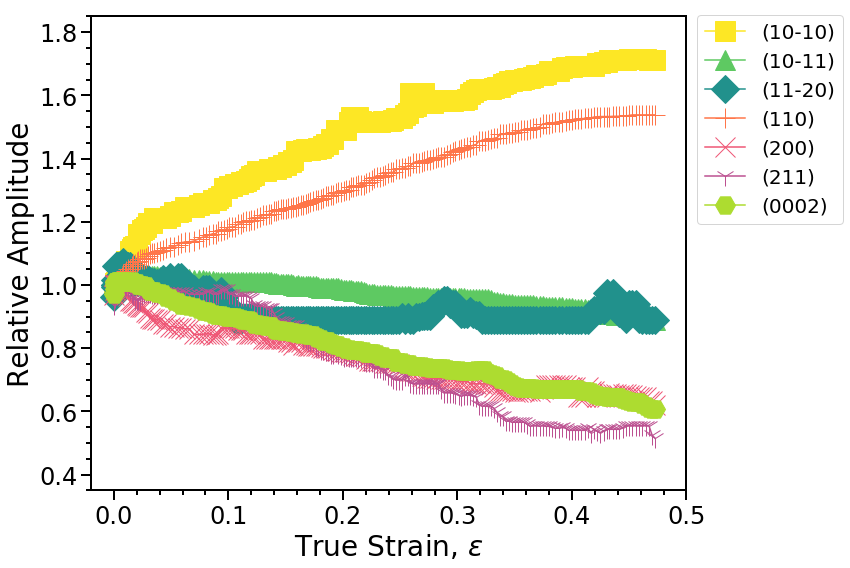

In [354]:
#reduced number of points and peaks
plt.figure(figsize=(10,8))
plt.minorticks_on()

for reflection in peak_list3:
# for reflection in peak_centres.keys():
#     if reflection !='(200)' and reflection !='(0004)' and reflection !='(220)' and reflection !='(110)' \
#     and reflection !='(10-12)' and reflection !='(10-13)' and reflection !='(11-22)' and reflection !='(20-21)':
        # -2 from start and end values as see no microstrain at image 3159 (but this starts at image 1)
        # whereas ETMT trace starts at 0 and shows load applied at image 3160 (slight delay in recording of 2)
    amplitude=relative_amplitude(medfilt(peak_amplitude[reflection][(start-2):(end-2)],15))
#         amplitude=medfilt(amplitude,15)
    plt.plot(trueStrain[0:200], amplitude[0:200],marker=plane_marker[reflection],color=plane_colour[reflection],markersize=20,label=reflection)
    #plt.legend()
#     plt.title('High Temp. Loading', fontsize=28)
    plt.ylabel('Relative Amplitude', fontsize=28)
    plt.xlabel('True Strain, ${\epsilon}$',fontsize=28)
    plt.legend(loc=1, bbox_to_anchor=(1.28,1.025))
    
    plt.xlim(-0.02,0.5)
    plt.ylim(0.35,1.85)
    
    plt.tight_layout()
    plot_name=save_number+'_Rel_Amplitude_TrueStrain_Red'
    plt.savefig(plot_name, bbox_inches='tight')

## Notes

In [244]:
# notes for changing the plot markers
(x,y, “o”, markersize=7,
markeredgewidth=1,markeredgecolor=‘g’,
markerfacecolor='None')

# changing the legend position
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

SyntaxError: invalid character in identifier (<ipython-input-244-f5aac865fb72>, line 2)